In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Socios Activos: (CATEGORÍA ACTIVOS)

In [3]:
# Read the csv file into a DataFrame
socios_activos = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Chapoteos/tablas/CSV/socios_activos.csv')
# Display the first few rows of the DataFrame
socios_activos.head()

,ID,Cliente,DNI,Email,Teléfono,Fecha alta
0,0,Juan de la Fuente Hormaechea,05316429w,achormaechea@gmail.com,609712590,13/10/2023
1,58,BOSCO MORO CONDE,28816889,MARTACONDE00@HOTMAIL.COM,626435282,12/04/2019
2,62,CHLOE D'AGOSTINO FUERTES,51087142,IFUERTESG@GMAIL.COM,637119861,14/04/2019
3,89,"MARCO SIERRA GUIX,",14304424,IRENEGUIX@HOTMAIL.COM,606667041,26/04/2019
4,97,"GUILLERMO AMARO RODRIGUEZ,",50102224,JESUS.AMARO.GARRIDO@GMAIL.COM,680628953,27/04/2019


##### Cleaning data types and format of the dataframe.

In [4]:
# Convert 'Fecha de alta' to datetime
socios_activos['Fecha alta'] = pd.to_datetime(socios_activos['Fecha alta'], errors='coerce', dayfirst=True)
# Correct the capitalization of the 'Cliente' column
socios_activos['Cliente'] = socios_activos['Cliente'].str.title()
# Correct the capitalization and remove the comma at the end of the names
socios_activos['Cliente'] = socios_activos['Cliente'].str.title().str.replace(',', '', regex=False)
# Convert the email column to lowercase
socios_activos['Email'] = socios_activos['Email'].str.lower()

In [5]:
# Find the row(s) where 'Cliente' is missing
missing_value_socios_activos = socios_activos[socios_activos['Cliente'].isnull()]
print(missing_value_socios_activos)

                   ID Cliente  DNI Email    Teléfono Fecha alta
1779              NaN     NaN  NaN   NaN         NaN        NaT
1780  Página 31 de 31     NaN  NaN   NaN  15/01/2025        NaT


In [6]:
# Delete the last two rows by using slicing
socios_activos = socios_activos[:-2]

In [7]:
# Count rows where both Phone Number and Email are missing
missing_both_count = socios_activos['Teléfono'].isnull() & socios_activos['Email'].isnull()

# Get the total count of rows with both values missing
total_missing_both = missing_both_count.sum()

print(total_missing_both)

27


In [8]:
# Calculate the percentage of rows with both Teléfono and Email missing
percentage_missing_both = (missing_both_count.sum() / len(socios_activos)) * 100

print(f"Percentage of rows with both missing: {percentage_missing_both:.2f}%")

Percentage of rows with both missing: 1.52%


##### Se observa que hay 27 clientes a los que les falta detalles de contacto que representa el 1.52% del total de la tabla.

##### Handle duplicates.

In [9]:
print("Total rows:", len(socios_activos))
print("Unique rows:", len(socios_activos.drop_duplicates()))
print("Number of duplicate rows:", len(socios_activos) - len(socios_activos.drop_duplicates()))

Total rows: 1779
Unique rows: 1779
Number of duplicate rows: 0


In [10]:
# Find duplicates in the 'ID' column
print(socios_activos[socios_activos['ID'].duplicated(keep=False)])

Empty DataFrame
Columns: [ID, Cliente, DNI, Email, Teléfono, Fecha alta]
Index: []


##### Handle missing values.

In [11]:
# Fill missing values in the 'DNI' column with 'desconocido'
socios_activos['DNI'] = socios_activos['DNI'].fillna('desconocido')
# Fill missing values in the 'Email' column with 'desconocido'
socios_activos['Email'] = socios_activos['Email'].fillna('desconocido')
# Fill missing values in the 'Teléfono' column with 'desconocido'
socios_activos['Teléfono'] = socios_activos['Teléfono'].fillna('desconocido')

In [12]:
socios_activos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1779 entries, 0 to 1778
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          1779 non-null   object        
 1   Cliente     1779 non-null   object        
 2   DNI         1779 non-null   object        
 3   Email       1779 non-null   object        
 4   Teléfono    1779 non-null   object        
 5   Fecha alta  1779 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 83.5+ KB


***

##### Socios Activos sin Cuota Vigente: (categoria Activos y No-Activos)

In [13]:
# Read the Excel file into a DataFrame
socios_activos_sin_cv = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Chapoteos/tablas/CSV/socios_activos_sin_cuota_vigente.csv')

# Display the first few rows of the DataFrame
socios_activos_sin_cv.head()

,ID,Nombre del Cliente,Telefono,Email,Actividad,Vigencia de la Cuota,Importe
0,10182,Jose Luis Sierra Campoy,644135263.0,carolina.campoy.b@gmail.com,Sin Actividad Vigente,01/12/2024 - 01/01/2025,79.00
1,10189,Juan Soto Cid,608710339.0,jsotoaprell@gmail.com,Sin Actividad Vigente,01/05/2024 - 01/07/2024,180.00
2,1028,Martin Ruiz Soto,618940508.0,MSOTORANERO@GMAIL.COM,Sin Actividad Vigente,31/07/2024 - 15/12/2024,225.15
3,10394,Fernando Alvarez,652162439.0,NaN,Sin Actividad Vigente,12/07/2023 - 01/08/2023,80.00
4,10399,Cp Esther Esther,678118106.0,esther.television@gmail.com,Sin Actividad Vigente,NaN,0.00


##### Cleaning data types and format of the dataframe.

In [14]:
# Rename columns
socios_activos_sin_cv = socios_activos_sin_cv.rename(columns={
    'Nombre del Cliente': 'Cliente',
    'Telefono': 'Teléfono'
})

In [15]:
# Convert the email column to lowercase
socios_activos_sin_cv['Email'] = socios_activos_sin_cv['Email'].str.lower()
# Convert the 'Telefono' column to string (and remove any unnecessary '.0')
socios_activos_sin_cv['Teléfono'] = socios_activos_sin_cv['Teléfono'].astype(str).str.replace('.0', '', regex=False)
# Correct the capitalization of the 'Cliente' column
socios_activos_sin_cv['Cliente'] = socios_activos_sin_cv['Cliente'].str.title()
# Convert the email column to lowercase
socios_activos_sin_cv['Actividad'] = socios_activos_sin_cv['Actividad'].str.lower()

In [16]:
socios_activos_sin_cv.tail(6)

,ID,Cliente,Teléfono,Email,Actividad,Vigencia de la Cuota,Importe
828,9999,Cp Gabriel Tubio Marguti,671977919,NaN,sin actividad vigente,NaN,0.00
829,NaN,NaN,nan,cuotas en la actividad sin actividad vigente,NaN,NaN,NaN
830,NaN,NaN,nan,NaN,total importes actividad: sin actividad vigente,NaN,829
831,NaN,NaN,nan,NaN,cuotas totales cobradas,Total importe cobrado:,829
832,NaN,NaN,nan,NaN,NaN,NaN,NaN
833,Página 24 de 24,NaN,nan,24,NaN,NaN,15/01/2025


In [17]:
# Delete the last two rows by using slicing
socios_activos_sin_cv = socios_activos_sin_cv[:-5]

In [18]:
# Split the 'Vigencia de la Cuota' column into two new columns
socios_activos_sin_cv[['Fecha comienzo', 'Fecha finalización']] = socios_activos_sin_cv['Vigencia de la Cuota'].str.split(' - ', expand=True)

# Convert the new columns to datetime format
socios_activos_sin_cv['Fecha comienzo'] = pd.to_datetime(socios_activos_sin_cv['Fecha comienzo'], dayfirst=True)
socios_activos_sin_cv['Fecha finalización'] = pd.to_datetime(socios_activos_sin_cv['Fecha finalización'], dayfirst=True)

# Delete the column Vigencia de la Cuota
socios_activos_sin_cv.drop('Vigencia de la Cuota', axis=1, inplace=True)

# Display the updated DataFrame
socios_activos_sin_cv.head()

,ID,Cliente,Teléfono,Email,Actividad,Importe,Fecha comienzo,Fecha finalización
0,10182,Jose Luis Sierra Campoy,644135263,carolina.campoy.b@gmail.com,sin actividad vigente,79.00,2024-12-01,2025-01-01
1,10189,Juan Soto Cid,608710339,jsotoaprell@gmail.com,sin actividad vigente,180.00,2024-05-01,2024-07-01
2,1028,Martin Ruiz Soto,618940508,msotoranero@gmail.com,sin actividad vigente,225.15,2024-07-31,2024-12-15
3,10394,Fernando Alvarez,652162439,NaN,sin actividad vigente,80.00,2023-07-12,2023-08-01
4,10399,Cp Esther Esther,678118106,esther.television@gmail.com,sin actividad vigente,0.00,NaT,NaT


##### Handle duplicates.

In [19]:
print("Total rows:", len(socios_activos_sin_cv))
print("Unique rows:", len(socios_activos_sin_cv.drop_duplicates()))
print("Number of duplicate rows:", len(socios_activos_sin_cv) - len(socios_activos_sin_cv.drop_duplicates()))

Total rows: 829
Unique rows: 829
Number of duplicate rows: 0


In [20]:
# Check duplicates in ID column
duplicated_ids = socios_activos_sin_cv[socios_activos_sin_cv['ID'].duplicated(keep=False)]
print("Duplicated IDs:")
print(duplicated_ids[['ID', 'Cliente']])
print(f"\nTotal duplicated IDs: {len(duplicated_ids)}")

print("\n" + "="*50 + "\n")

# Check duplicates in Cliente column
duplicated_clients = socios_activos_sin_cv[socios_activos_sin_cv['Cliente'].duplicated(keep=False)]
print("Duplicated Clients:")
print(duplicated_clients[['ID', 'Cliente']])
print(f"\nTotal duplicated Clients: {len(duplicated_clients)}")

Duplicated IDs:
Empty DataFrame
Columns: [ID, Cliente]
Index: []

Total duplicated IDs: 0


Duplicated Clients:
        ID               Cliente
177  12392  Cp Stephanie  Mojica
262  13276  Cp Stephanie  Mojica
296  13594   Duplicada Duplicada
671   9069   Duplicada Duplicada
702   9250   Duplicada Duplicada

Total duplicated Clients: 5


In [21]:
# Filter rows where Cliente is 'Duplicada Duplicada'
duplicated_full = socios_activos_sin_cv[socios_activos_sin_cv['Cliente'] == 'Duplicada Duplicada']

# Display all columns for these rows
print("Full information for 'Duplicada Duplicada' entries:")
print(duplicated_full)

Full information for 'Duplicada Duplicada' entries:
        ID              Cliente Teléfono Email              Actividad Importe  \
296  13594  Duplicada Duplicada      nan   NaN  sin actividad vigente    0.00   
671   9069  Duplicada Duplicada      nan   NaN  sin actividad vigente    0.00   
702   9250  Duplicada Duplicada      nan   NaN  sin actividad vigente    0.00   

    Fecha comienzo Fecha finalización  
296            NaT                NaT  
671            NaT                NaT  
702            NaT                NaT  


In [22]:
# Drop rows where Cliente is 'Duplicada Duplicada'
socios_activos_sin_cv = socios_activos_sin_cv[socios_activos_sin_cv['Cliente'] != 'Duplicada Duplicada']

# Verify the rows were dropped
print(f"New dataframe shape: {socios_activos_sin_cv.shape}")

# Double check there are no more 'Duplicada Duplicada' entries
check = socios_activos_sin_cv[socios_activos_sin_cv['Cliente'] == 'Duplicada Duplicada']
print(f"\nRemaining 'Duplicada Duplicada' entries: {len(check)}")

New dataframe shape: (826, 8)

Remaining 'Duplicada Duplicada' entries: 0


In [23]:
# Find and display rows where Cliente appears more than once
duplicates = socios_activos_sin_cv[socios_activos_sin_cv.groupby('Cliente')['Cliente'].transform('count') > 1]
print(duplicates.sort_values('Cliente'))

        ID               Cliente   Teléfono                         Email  \
177  12392  Cp Stephanie  Mojica  636898855  stephanie.mojica@hotmail.com   
262  13276  Cp Stephanie  Mojica  636898855           steffy986@gmail.com   

                 Actividad Importe Fecha comienzo Fecha finalización  
177  sin actividad vigente    0.00            NaT                NaT  
262  sin actividad vigente    0.00            NaT                NaT  


##### Existe un registro de clientes con dos ID diferentes para el mismo cliente. Cp Stephanie Mojica.

##### Handle missing values.

In [24]:
# Fill missing values in the 'Email' column with 'desconocido'
socios_activos_sin_cv['Email'] = socios_activos_sin_cv['Email'].fillna('desconocido')

In [25]:
# Print unique values in the 'Actividad' column
print(socios_activos_sin_cv['Actividad'].unique())

['sin actividad vigente']


In [26]:
# Fill NaT values with a zero date (using pandas minimum datetime)
zero_date = pd.Timestamp.min  # This is '1677-09-21'
# Or you could use a specific date like:
# zero_date = pd.Timestamp('1900-01-01')

# Fill NaT values in both columns
socios_activos_sin_cv['Fecha comienzo'] = socios_activos_sin_cv['Fecha comienzo'].fillna(zero_date)
socios_activos_sin_cv['Fecha finalización'] = socios_activos_sin_cv['Fecha finalización'].fillna(zero_date)

# Verify the changes
print(socios_activos_sin_cv[['Fecha comienzo', 'Fecha finalización']].info())

<class 'pandas.core.frame.DataFrame'>
Index: 826 entries, 0 to 828
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Fecha comienzo      826 non-null    datetime64[ns]
 1   Fecha finalización  826 non-null    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 19.4 KB
None


In [27]:
# Convert Importe to float
socios_activos_sin_cv['Importe'] = socios_activos_sin_cv['Importe'].astype(float)

In [28]:
socios_activos_sin_cv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 826 entries, 0 to 828
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  826 non-null    object        
 1   Cliente             826 non-null    object        
 2   Teléfono            826 non-null    object        
 3   Email               826 non-null    object        
 4   Actividad           826 non-null    object        
 5   Importe             826 non-null    float64       
 6   Fecha comienzo      826 non-null    datetime64[ns]
 7   Fecha finalización  826 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 58.1+ KB


In [29]:
# Calculate duration in months
socios_activos_sin_cv['Duración'] = (
    (socios_activos_sin_cv['Fecha finalización'].dt.year - socios_activos_sin_cv['Fecha comienzo'].dt.year) * 12 +
    (socios_activos_sin_cv['Fecha finalización'].dt.month - socios_activos_sin_cv['Fecha comienzo'].dt.month)
)
print(socios_activos_sin_cv['Duración'].unique())

[ 1  2  5  0  4  3 14 10  7  6]


In [30]:
# Count NaN values
nan_count = socios_activos_sin_cv['Duración'].isna().sum()
print(f"Number of NaN values in Duration column: {nan_count}")

Number of NaN values in Duration column: 0


***

##### Crear una tabla nueva para clientes no-activos y mantener los clientes activos en esta tabla.

In [31]:
def classify_client(row):
    if row['Importe'] == 0.0 and row['Fecha comienzo'] == pd.Timestamp.min and row['Fecha finalización'] == pd.Timestamp.min:
        return 'Lead para información'
    elif row['Importe'] == 0.0 and (row['Fecha comienzo'] != pd.Timestamp.min or row['Fecha finalización'] != pd.Timestamp.min):
        return 'Servicio gratis'
    elif row['Importe'] > 0.0:
        return 'Activo'
    else:
        return 'Indefinido'  # Just in case there are any cases that don't match the above conditions

# Add the new classification column
socios_activos_sin_cv['Tipo cliente'] = socios_activos_sin_cv.apply(classify_client, axis=1)

# You can then see the distribution of client types
client_type_distribution = socios_activos_sin_cv['Tipo cliente'].value_counts()
print("\nDistribución de tipos de clientes:")
print(client_type_distribution)

# If you want to see the percentage distribution
client_type_percentage = socios_activos_sin_cv['Tipo cliente'].value_counts(normalize=True) * 100
print("\nPorcentaje de distribución de tipos de clientes:")
print(client_type_percentage)


Distribución de tipos de clientes:
Tipo cliente
Lead para información    580
Activo                   226
Servicio gratis           20
Name: count, dtype: int64

Porcentaje de distribución de tipos de clientes:
Tipo cliente
Lead para información    70.217918
Activo                   27.360775
Servicio gratis           2.421308
Name: proportion, dtype: float64


In [32]:
socios_activos_sin_cv.head()

,ID,Cliente,Teléfono,Email,Actividad,Importe,Fecha comienzo,Fecha finalización,Duración,Tipo cliente
0,10182,Jose Luis Sierra Campoy,644135263,carolina.campoy.b@gmail.com,sin actividad vigente,79.00,2024-12-01 00:00:00.000000000,2025-01-01 00:00:00.000000000,1,Activo
1,10189,Juan Soto Cid,608710339,jsotoaprell@gmail.com,sin actividad vigente,180.00,2024-05-01 00:00:00.000000000,2024-07-01 00:00:00.000000000,2,Activo
2,1028,Martin Ruiz Soto,618940508,msotoranero@gmail.com,sin actividad vigente,225.15,2024-07-31 00:00:00.000000000,2024-12-15 00:00:00.000000000,5,Activo
3,10394,Fernando Alvarez,652162439,desconocido,sin actividad vigente,80.00,2023-07-12 00:00:00.000000000,2023-08-01 00:00:00.000000000,1,Activo
4,10399,Cp Esther Esther,678118106,esther.television@gmail.com,sin actividad vigente,0.00,1677-09-21 00:12:43.145224193,1677-09-21 00:12:43.145224193,0,Lead para información


In [33]:
socios_activos_sin_cv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 826 entries, 0 to 828
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  826 non-null    object        
 1   Cliente             826 non-null    object        
 2   Teléfono            826 non-null    object        
 3   Email               826 non-null    object        
 4   Actividad           826 non-null    object        
 5   Importe             826 non-null    float64       
 6   Fecha comienzo      826 non-null    datetime64[ns]
 7   Fecha finalización  826 non-null    datetime64[ns]
 8   Duración            826 non-null    int32         
 9   Tipo cliente        826 non-null    object        
dtypes: datetime64[ns](2), float64(1), int32(1), object(6)
memory usage: 67.8+ KB


##### La tabla socios_activos_sin_cv ahora solamente contiene clientes activos, es decir, convertidos en clientes que pagaron una cuota para un servicio.

In [34]:
# Save file with new name 'clientes_activos'.
socios_activos_sin_cv.to_csv('/Users/cesarchaparro/Desktop/GitHub/Chapoteos/tablas/CSV/clientes.csv', index=False)

In [35]:
clientes = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Chapoteos/tablas/CSV/clientes.csv')
clientes.head()

,ID,Cliente,Teléfono,Email,Actividad,Importe,Fecha comienzo,Fecha finalización,Duración,Tipo cliente
0,10182,Jose Luis Sierra Campoy,644135263.0,carolina.campoy.b@gmail.com,sin actividad vigente,79.00,2024-12-01 00:00:00.000000000,2025-01-01 00:00:00.000000000,1,Activo
1,10189,Juan Soto Cid,608710339.0,jsotoaprell@gmail.com,sin actividad vigente,180.00,2024-05-01 00:00:00.000000000,2024-07-01 00:00:00.000000000,2,Activo
2,1028,Martin Ruiz Soto,618940508.0,msotoranero@gmail.com,sin actividad vigente,225.15,2024-07-31 00:00:00.000000000,2024-12-15 00:00:00.000000000,5,Activo
3,10394,Fernando Alvarez,652162439.0,desconocido,sin actividad vigente,80.00,2023-07-12 00:00:00.000000000,2023-08-01 00:00:00.000000000,1,Activo
4,10399,Cp Esther Esther,678118106.0,esther.television@gmail.com,sin actividad vigente,0.00,1677-09-21 00:12:43.145224193,1677-09-21 00:12:43.145224193,0,Lead para información


In [36]:
# Fill missing values in the 'Teléfono' column with 'desconocido'
clientes['Teléfono'] = clientes['Teléfono'].fillna('desconocido')

In [37]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  826 non-null    int64  
 1   Cliente             826 non-null    object 
 2   Teléfono            826 non-null    object 
 3   Email               826 non-null    object 
 4   Actividad           826 non-null    object 
 5   Importe             826 non-null    float64
 6   Fecha comienzo      826 non-null    object 
 7   Fecha finalización  826 non-null    object 
 8   Duración            826 non-null    int64  
 9   Tipo cliente        826 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 64.7+ KB


***

##### Cuotas Vigentes por Actividad (CATEGORÍA ACTIVOS)

In [38]:
# Read the Excel file into a DataFrame
cuotas_vigentes_actividad = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Chapoteos/tablas/CSV/cuotas_vigentes_por_actividad.csv')

# Display the first few rows of the DataFrame
cuotas_vigentes_actividad.head()

,ID,Nombre del Cliente,Telefono,Email,Actividad,Vigencia de la Cuota,Periodo,Importe
0,7188.0,Akira Rodríguez Todoroki,669079354.0,Naomi_todoroki@hotmail.com,BEBES MAYORES,01/09/2024 - 01/07/2025,10 meses,632.00
1,5990.0,Alejandra Parra Casado,645191368.0,SANDRA.CASADO.LOPEZ@GMAIL.COM,BEBES MAYORES,01/09/2024 - 01/07/2025,10 meses,592.50
2,8811.0,Alvaro Garcia-Gil Romero,686936698.0,clarloschus@gmail.com,BEBES MAYORES,01/09/2024 - 01/07/2025,10 meses,671.50
3,7648.0,Bernabe Garcia-Conde Colomo,619208541.0,inmadt@telefonica.net,BEBES MAYORES,01/09/2024 - 01/07/2025,10 meses,632.00
4,7876.0,Camila Flores Gonzalez,683647770.0,rebeca.g.hidalgo@gmail.com,BEBES MAYORES,01/09/2024 - 01/07/2025,10 meses,920.00


##### Cleaning data types and format of the dataframe.

In [39]:
# Rename columns
cuotas_vigentes_actividad = cuotas_vigentes_actividad.rename(columns={
    'Nombre del Cliente': 'Cliente',
    'Telefono': 'Teléfono'
})

In [40]:
# Convert Importe to float64, handling errors
cuotas_vigentes_actividad['Importe'] = pd.to_numeric(cuotas_vigentes_actividad['Importe'], errors='coerce')  # Coerce invalid values to NaN
# Convert the email column to lowercase
cuotas_vigentes_actividad['Email'] = cuotas_vigentes_actividad['Email'].str.lower()
# Convert the 'Telefono' column to string (and remove any unnecessary '.0')
cuotas_vigentes_actividad['Teléfono'] = cuotas_vigentes_actividad['Teléfono'].astype(str).str.replace('.0', '', regex=False)
# Convert the 'ID' column to string (and remove any unnecessary '.0')
cuotas_vigentes_actividad['ID'] = cuotas_vigentes_actividad['ID'].astype(str).str.replace('.0', '', regex=False)
# Convert the email column to lowercase
cuotas_vigentes_actividad['Actividad'] = cuotas_vigentes_actividad['Actividad'].str.lower()
# Convert the client column to title case
cuotas_vigentes_actividad['Cliente'] = cuotas_vigentes_actividad['Cliente'].str.title()
# Drop 'Periodo' column
cuotas_vigentes_actividad = cuotas_vigentes_actividad.drop('Periodo', axis=1)

In [41]:
# Split the 'Vigencia de la Cuota' column into two new columns
cuotas_vigentes_actividad[['Fecha comienzo', 'Fecha finalización']] = cuotas_vigentes_actividad['Vigencia de la Cuota'].str.split(' - ', expand=True)

# Convert the new columns to datetime format
cuotas_vigentes_actividad['Fecha comienzo'] = pd.to_datetime(cuotas_vigentes_actividad['Fecha comienzo'], dayfirst=True)
cuotas_vigentes_actividad['Fecha finalización'] = pd.to_datetime(cuotas_vigentes_actividad['Fecha finalización'], dayfirst=True)

# Delete the column Vigencia de la Cuota
cuotas_vigentes_actividad.drop('Vigencia de la Cuota', axis=1, inplace=True)

# Display the updated DataFrame
cuotas_vigentes_actividad.head()

,ID,Cliente,Teléfono,Email,Actividad,Importe,Fecha comienzo,Fecha finalización
0,7188,Akira Rodríguez Todoroki,669079354,naomi_todoroki@hotmail.com,bebes mayores,632.0,2024-09-01,2025-07-01
1,5990,Alejandra Parra Casado,645191368,sandra.casado.lopez@gmail.com,bebes mayores,592.5,2024-09-01,2025-07-01
2,8811,Alvaro Garcia-Gil Romero,686936698,clarloschus@gmail.com,bebes mayores,671.5,2024-09-01,2025-07-01
3,7648,Bernabe Garcia-Conde Colomo,619208541,inmadt@telefonica.net,bebes mayores,632.0,2024-09-01,2025-07-01
4,7876,Camila Flores Gonzalez,683647770,rebeca.g.hidalgo@gmail.com,bebes mayores,920.0,2024-09-01,2025-07-01


In [42]:
# Print unique values in the 'Actividad' column
print(cuotas_vigentes_actividad['Actividad'].unique())

['bebes mayores' 'bebes medianos' 'bebes pequeños' 'bebes pre escuela'
 'escuela' 'grupos reducidos' 'pre escuela' 'adultos aprendizaje'
 'act acuatica embarazadas' 'bono 10 baños' 'adultos mantenimiento'
 'escuelas infantiles']


##### Handle duplicates.

In [43]:
# Find duplicates in the 'ID' column
cuotas_vigentes_actividad[cuotas_vigentes_actividad['ID'].duplicated(keep=False)]

,ID,Cliente,Teléfono,Email,Actividad,Importe,Fecha comienzo,Fecha finalización
75,9197,Rodrigo Peláez Martínez-Barquero,648871011,pelfro@hotmail.com,bebes medianos,632.0,2024-07-01,2025-05-01
262,6473,Rodrigo Garcia Fernandez-Parodi,615053195,cristina.pfp@gmail.com,bebes mayores,284.4,2024-10-01,2025-02-01
294,12927,Rodrigo Garcia Arroyo,610996250,coraliayjavier@gmail.com,bebes medianos,300.2,2024-11-01,2025-03-01
355,14684,Oliver Espinosa Romero,604882925,pablosvet@gmail.com,escuela,0.0,2025-01-14,2025-05-01
431,14368,Gabriel Acevedo,689189710,nicaguto@gmail.com,bebes pre escuela,0.0,2024-09-28,2025-02-01
438,14368,Gabriel Acevedo,689189710,nicaguto@gmail.com,grupos reducidos,300.2,2024-09-22,2025-02-01
464,9197,Rodrigo Peláez Martínez-Barquero,648871011,pelfro@hotmail.com,bebes mayores,0.0,2024-11-13,2025-07-01
503,12927,Rodrigo Garcia Arroyo,610996250,coraliayjavier@gmail.com,bebes medianos,39.5,2024-12-01,2025-02-01
524,14684,Oliver Espinosa Romero,604882925,pablosvet@gmail.com,pre escuela,426.6,2024-11-01,2025-01-19
709,6473,Rodrigo Garcia Fernandez-Parodi,615053195,cristina.pfp@gmail.com,bebes pre escuela,0.0,2025-01-01,2025-02-01


In [44]:
print("Total rows:", len(cuotas_vigentes_actividad))
print("Unique rows:", len(cuotas_vigentes_actividad.drop_duplicates()))
print("Number of duplicate rows:", len(cuotas_vigentes_actividad) - len(cuotas_vigentes_actividad.drop_duplicates()))

Total rows: 955
Unique rows: 955
Number of duplicate rows: 0


In [45]:
# Drop all rows where 'ID' is duplicated
cuotas_vigentes_actividad = cuotas_vigentes_actividad[~cuotas_vigentes_actividad['ID'].duplicated(keep=False)]
# Verify the result
print(f"Number of rows after dropping duplicates: {len(cuotas_vigentes_actividad)}")

Number of rows after dropping duplicates: 945


##### Handle missing values.

In [46]:
# Fill missing values in the 'Email' column with 'desconocido'
cuotas_vigentes_actividad['Email'] = cuotas_vigentes_actividad['Email'].fillna('desconocido')

In [47]:
# Find rows where 'Importe' is NaN
discrepancy_rows = cuotas_vigentes_actividad[cuotas_vigentes_actividad['Importe'].isna()]
# Display the rows with discrepancies
discrepancy_rows

,ID,Cliente,Teléfono,Email,Actividad,Importe,Fecha comienzo,Fecha finalización
728,14626,Escuela Infantil Altamira,652409381,dburgos@workandlife.com,escuelas infantiles,NaN,2025-01-01,2025-02-01


##### Existe un cliente bajo la categoria de Escuelas Infantiles con actividad pero sin pago.

In [48]:
# Fill NaN values in 'Importe' column with 0.00 and ensure float64 type
cuotas_vigentes_actividad['Importe'] = cuotas_vigentes_actividad['Importe'].fillna(0.00).astype('float64')

In [119]:
zero_importe = cuotas_vigentes_actividad[cuotas_vigentes_actividad['Importe'] == 0.0]
pd.set_option('display.max_rows', 62)
print(zero_importe.head(62))

        ID                                Cliente   Teléfono  \
38    9421                    Mia Hernando Medina  675861792   
47    9923                Pepe Bermudez Rodríguez  606166414   
87    4934                Aharon De Bonis Humanes  617528159   
97   12082                    Erik Zonca Martinez  622849517   
133    384              Carlos Rodriguez Gonzalez  661363135   
136    941               Carlota Samaran Ferreiro  671020355   
151   1253                Jimena Samaran Ferreiro  671020355   
164    898                    Oliver Gomez Martin  616216419   
181   4940              Mateo Jose Martin Manzano  670976765   
200   3328                 Gabriela Romero Aguado  652797161   
210  12063               Martina Garcia Fernandez  686845916   
248   8089                 Diego Birnbaum Cabrero  616342743   
285  13218                   Martin Jimenez Quero  675735528   
298  12994      Adriana Mañas Rodríguez  (Tienda)  605925298   
302  14866               Astrid Hernando

In [50]:
zero_importe = cuotas_vigentes_actividad[cuotas_vigentes_actividad['Importe'] == 0.0]
count = len(zero_importe)
print(f"Number of clients with Importe = 0.0: {count}")

Number of clients with Importe = 0.0: 62


##### Existen 62 clientes activos que están recibiendo un servicio pero no hay registro de pago.

In [51]:
# Verify the data type and that there are no more NaN values
print("Data type of Importe column:", cuotas_vigentes_actividad['Importe'].dtype)
print("Number of NaN values:", cuotas_vigentes_actividad['Importe'].isna().sum())

Data type of Importe column: float64
Number of NaN values: 0


In [52]:
# Calculate duration in months
cuotas_vigentes_actividad['Duración'] = (
    (cuotas_vigentes_actividad['Fecha finalización'].dt.year - cuotas_vigentes_actividad['Fecha comienzo'].dt.year) * 12 +
    (cuotas_vigentes_actividad['Fecha finalización'].dt.month - cuotas_vigentes_actividad['Fecha comienzo'].dt.month)
)
print(cuotas_vigentes_actividad['Duración'].unique())

[10 11 14  4  5  7  8  9  2  1  6  3]


In [53]:
def classify_client_cuotas(row):
    if row['Importe'] == 0.0 and (row['Fecha comienzo'] != pd.Timestamp.min or row['Fecha finalizacion'] != pd.Timestamp.min):
        return 'Servicio gratis'
    elif row['Importe'] > 0.0:
        return 'Activo'
    else:
        return 'Indefinido'  # For any cases that don't match the above conditions

# Add the new classification column
cuotas_vigentes_actividad['Tipo cliente'] = cuotas_vigentes_actividad.apply(classify_client_cuotas, axis=1)

# See the distribution of client types
client_type_distribution = cuotas_vigentes_actividad['Tipo cliente'].value_counts()
print("\nDistribución de tipos de clientes:")
print(client_type_distribution)

# See the percentage distribution
client_type_percentage = cuotas_vigentes_actividad['Tipo cliente'].value_counts(normalize=True) * 100
print("\nPorcentaje de distribución de tipos de clientes:")
print(client_type_percentage)


Distribución de tipos de clientes:
Tipo cliente
Activo             883
Servicio gratis     62
Name: count, dtype: int64

Porcentaje de distribución de tipos de clientes:
Tipo cliente
Activo             93.439153
Servicio gratis     6.560847
Name: proportion, dtype: float64


In [54]:
cuotas_vigentes_actividad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 945 entries, 0 to 954
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  945 non-null    object        
 1   Cliente             945 non-null    object        
 2   Teléfono            945 non-null    object        
 3   Email               945 non-null    object        
 4   Actividad           945 non-null    object        
 5   Importe             945 non-null    float64       
 6   Fecha comienzo      945 non-null    datetime64[ns]
 7   Fecha finalización  945 non-null    datetime64[ns]
 8   Duración            945 non-null    int32         
 9   Tipo cliente        945 non-null    object        
dtypes: datetime64[ns](2), float64(1), int32(1), object(6)
memory usage: 77.5+ KB


##### En resumen, esta tabla contiene clientes activos que han realizado un pago para un servicio y clientes que tienen pendiente un pago para el servicio.

***

##### Join both tables with active customers.

In [55]:
# Concatenate the two tables vertically
total_clientes = pd.concat([clientes, cuotas_vigentes_actividad], axis=0)

# Reset the index
total_clientes = total_clientes.reset_index(drop=True)

# Verify the combination
print("Number of rows in socios_activos_sin_cv:", len(clientes))
print("Number of rows in cuotas_vigentes_actividad:", len(cuotas_vigentes_actividad))
print("Number of rows in combined table:", len(total_clientes))

# Show the columns to verify they match
print("\nColumns in combined table:")
print(total_clientes.columns)

Number of rows in socios_activos_sin_cv: 826
Number of rows in cuotas_vigentes_actividad: 945
Number of rows in combined table: 1771

Columns in combined table:
Index(['ID', 'Cliente', 'Teléfono', 'Email', 'Actividad', 'Importe',
       'Fecha comienzo', 'Fecha finalización', 'Duración', 'Tipo cliente'],
      dtype='object')


In [56]:
total_clientes.head()

,ID,Cliente,Teléfono,Email,Actividad,Importe,Fecha comienzo,Fecha finalización,Duración,Tipo cliente
0,10182,Jose Luis Sierra Campoy,644135263.0,carolina.campoy.b@gmail.com,sin actividad vigente,79.00,2024-12-01 00:00:00.000000000,2025-01-01 00:00:00.000000000,1,Activo
1,10189,Juan Soto Cid,608710339.0,jsotoaprell@gmail.com,sin actividad vigente,180.00,2024-05-01 00:00:00.000000000,2024-07-01 00:00:00.000000000,2,Activo
2,1028,Martin Ruiz Soto,618940508.0,msotoranero@gmail.com,sin actividad vigente,225.15,2024-07-31 00:00:00.000000000,2024-12-15 00:00:00.000000000,5,Activo
3,10394,Fernando Alvarez,652162439.0,desconocido,sin actividad vigente,80.00,2023-07-12 00:00:00.000000000,2023-08-01 00:00:00.000000000,1,Activo
4,10399,Cp Esther Esther,678118106.0,esther.television@gmail.com,sin actividad vigente,0.00,1677-09-21 00:12:43.145224193,1677-09-21 00:12:43.145224193,0,Lead para información


In [57]:
total_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1771 entries, 0 to 1770
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  1771 non-null   object 
 1   Cliente             1771 non-null   object 
 2   Teléfono            1771 non-null   object 
 3   Email               1771 non-null   object 
 4   Actividad           1771 non-null   object 
 5   Importe             1771 non-null   float64
 6   Fecha comienzo      1771 non-null   object 
 7   Fecha finalización  1771 non-null   object 
 8   Duración            1771 non-null   int64  
 9   Tipo cliente        1771 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 138.5+ KB


##### Handle missing values.

In [58]:
# Convert 'Fecha comienzo' and 'Fecha finalización' to datetime
total_clientes['Fecha comienzo'] = pd.to_datetime(total_clientes['Fecha comienzo'])
total_clientes['Fecha finalización'] = pd.to_datetime(total_clientes['Fecha finalización'])

##### Check consistency on columns.

In [59]:
total_clientes['Duración'].unique()

array([ 1,  2,  5,  0,  4,  3, 14, 10,  7,  6, 11,  8,  9])

In [60]:
# Print unique values in the 'Actividad' column
print(total_clientes['Actividad'].unique())

['sin actividad vigente' 'bebes mayores' 'bebes medianos' 'bebes pequeños'
 'bebes pre escuela' 'escuela' 'grupos reducidos' 'pre escuela'
 'adultos aprendizaje' 'act acuatica embarazadas' 'bono 10 baños'
 'adultos mantenimiento' 'escuelas infantiles']


##### Handle dupplicates.

In [61]:
# Check duplicates in Cliente first, then analyze their IDs
duplicates_by_cliente = total_clientes[total_clientes.duplicated(subset=['Cliente'], keep=False)]
print("Duplicates by Cliente:")
print(duplicates_by_cliente.sort_values('Cliente')[['Cliente', 'ID']])

# Group by to see all instances
grouped_duplicates = (total_clientes
                     .groupby('Cliente')['ID']
                     .agg(list)
                     .reset_index()
                     .loc[lambda x: x['ID'].str.len() > 1])
print("\nGrouped analysis:")
print(grouped_duplicates)

# Detailed analysis of specific cases
for cliente in grouped_duplicates['Cliente']:
    print(f"\nEntries for cliente: {cliente}")
    print(total_clientes[total_clientes['Cliente'] == cliente][['Cliente', 'ID']])

# Count occurrences
duplicate_counts = (total_clientes
                   .groupby(['Cliente', 'ID'])
                   .size()
                   .reset_index(name='count')
                   .sort_values('count', ascending=False))
print("\nCounts of duplicate entries:")
print(duplicate_counts[duplicate_counts['count'] > 1])

Duplicates by Cliente:
                                   Cliente     ID
32                  Alberto Villar Alvarez  10779
1061                Alberto Villar Alvarez  10779
1706  Alejandra Del Rocio Colmenares López  14251
341   Alejandra Del Rocio Colmenares López  14251
780                       Bosco Nuñez Mata   9709
1068                      Bosco Nuñez Mata   9709
1204                 Chloe Oñate Maldonado  12309
163                  Chloe Oñate Maldonado  12309
177                   Cp Stephanie  Mojica  12392
262                   Cp Stephanie  Mojica  13276
1709         Daniel Horacio Juárez Riffrán  13148
250          Daniel Horacio Juárez Riffrán  13148
1327            Gabriel Andres Diaz Millan  13990
317             Gabriel Andres Diaz Millan  13990
1187             Gonzalo Barrios Fernandez   9944
812              Gonzalo Barrios Fernandez   9944
1576                   Iker Figueroa Mills  14524
356                    Iker Figueroa Mills  14524
1390                       


Grouped analysis:
                                   Cliente              ID
154                 Alberto Villar Alvarez  [10779, 10779]
158   Alejandra Del Rocio Colmenares López  [14251, 14251]
305                       Bosco Nuñez Mata    [9709, 9709]
372                  Chloe Oñate Maldonado  [12309, 12309]
743                   Cp Stephanie  Mojica  [12392, 13276]
814          Daniel Horacio Juárez Riffrán  [13148, 13148]
921             Gabriel Andres Diaz Millan  [13990, 13990]
953              Gonzalo Barrios Fernandez    [9944, 9944]
1004                   Iker Figueroa Mills  [14524, 14524]
1026                         Isabel Mencía  [14268, 14268]
1100               Jose Luis Sierra Campoy  [10182, 10182]
1118                Julia Hernandez Narros    [6124, 6124]
1137                  Kenzo Figueroa Mills  [14526, 14526]
1268                  Lukas Figueroa Mills  [14523, 14523]
1271                   Luna Figueroa Mills  [14525, 14525]
1324         Maria Henar Sarmiento Ca

##### 21 clientes duplicados.

In [62]:
# More detailed check
print("Before cleaning:")
print(total_clientes.groupby(['Cliente', 'ID']).size().reset_index(name='count'))
print("\nRows with multiple occurrences:")
print(total_clientes.groupby(['Cliente', 'ID']).size()[total_clientes.groupby(['Cliente', 'ID']).size() > 1])

# Explicit duplicate check
duplicates = total_clientes[total_clientes.duplicated(['Cliente', 'ID'], keep=False)]
print("\nDuplicate rows found:", len(duplicates))

# Try removing duplicates with explicit parameters
clients_combined_clean = total_clientes.drop_duplicates(
    subset=['Cliente', 'ID'],
    keep='first',
    ignore_index=True
)

print("\nOriginal shape:", total_clientes.shape)
print("New shape:", clients_combined_clean.shape)

# Check for hidden characters or spaces
print("\nSample of potentially problematic rows:")
for idx, row in total_clientes[total_clientes['Cliente'] == 'Alberto Villar Alvarez'].iterrows():
    print(f"ID: {repr(row['ID'])}")
    print(f"Cliente: {repr(row['Cliente'])}")

Before cleaning:
                                  Cliente     ID  count
0                          Cp Lucía Ávila  12393      1
1     ! Cp Anni Christina Marulanda Muñoz  10542      1
2           !Cp  Zoe Zayra Leal Cristaldo  11108      1
3                 !Cp Aarón Martin García  13305      1
4               !Cp Adaia Asensio Suescun  12170      1
...                                   ...    ...    ...
1766              Álex Andrade De La Cruz  13514      1
1767                Álvaro Benito Herrero  13593      1
1768                 Álvaro Oliva Bragado  11308      1
1769            Álvaro Peláez  De Freitas  12062      1
1770            Ángel Hernández De Santos  13675      1

[1771 rows x 3 columns]

Rows with multiple occurrences:
Series([], dtype: int64)

Duplicate rows found: 0

Original shape: (1771, 10)
New shape: (1771, 10)

Sample of potentially problematic rows:
ID: 10779
Cliente: 'Alberto Villar Alvarez'
ID: '10779'
Cliente: 'Alberto Villar Alvarez'


In [63]:
# Standardize ID column to string format
total_clientes['ID'] = total_clientes['ID'].astype(str)

# Now try removing duplicates again
print("Before cleaning:", len(total_clientes))
total_clientes = total_clientes.drop_duplicates(subset=['Cliente', 'ID'])
print("After cleaning:", len(total_clientes))

# Verify the removal worked
duplicates = total_clientes[total_clientes.duplicated(['Cliente', 'ID'], keep=False)]
print("Remaining duplicates:", len(duplicates))

# Optional: Reset index after cleaning
total_clientes = total_clientes.reset_index(drop=True)

# Show sample of cleaned data
print("\nSample of cleaned data:")
print(total_clientes[['Cliente', 'ID']].head())

Before cleaning: 1771
After cleaning: 1750
Remaining duplicates: 0

Sample of cleaned data:
                   Cliente     ID
0  Jose Luis Sierra Campoy  10182
1            Juan Soto Cid  10189
2         Martin Ruiz Soto   1028
3         Fernando Alvarez  10394
4         Cp Esther Esther  10399


In [64]:
# Check duplicates in ID column
duplicates_ID = total_clientes[total_clientes['ID'].duplicated(keep=False)]
print("\nDuplicates in ID column:")
print(f"Number of duplicate IDs: {len(duplicates_ID)}")
if len(duplicates_ID) > 0:
    print("\nRows with duplicate IDs:")
    print(duplicates_ID.sort_values('ID'))

# Check duplicates in Cliente column
duplicates_Cliente = total_clientes[total_clientes['Cliente'].duplicated(keep=False)]
print("\nDuplicates in Cliente column:")
print(f"Number of duplicate Clients: {len(duplicates_Cliente)}")
if len(duplicates_Cliente) > 0:
    print("\nRows with duplicate Clients:")
    print(duplicates_Cliente.sort_values('Cliente'))

# Get value counts for each column to see how many times each value appears
print("\nCount of duplicate IDs:")
print(total_clientes['ID'].value_counts()[total_clientes['ID'].value_counts() > 1])

print("\nCount of duplicate Clients:")
print(total_clientes['Cliente'].value_counts()[total_clientes['Cliente'].value_counts() > 1])


Duplicates in ID column:
Number of duplicate IDs: 0

Duplicates in Cliente column:
Number of duplicate Clients: 2

Rows with duplicate Clients:
        ID               Cliente     Teléfono                         Email  \
177  12392  Cp Stephanie  Mojica  636898855.0  stephanie.mojica@hotmail.com   
262  13276  Cp Stephanie  Mojica  636898855.0           steffy986@gmail.com   

                 Actividad  Importe                Fecha comienzo  \
177  sin actividad vigente      0.0 1677-09-21 00:12:43.145224193   
262  sin actividad vigente      0.0 1677-09-21 00:12:43.145224193   

               Fecha finalización  Duración           Tipo cliente  
177 1677-09-21 00:12:43.145224193         0  Lead para información  
262 1677-09-21 00:12:43.145224193         0  Lead para información  

Count of duplicate IDs:
Series([], Name: count, dtype: int64)

Count of duplicate Clients:
Cliente
Cp Stephanie  Mojica    2
Name: count, dtype: int64


##### Hay un cliente categoría lead para información que se registró en el sistema con dos ID diferentes, y datos diferentes para el mismo cliente. No está claro si es el mismo cliente o son dos clientes diferentes. No lo voy a eliminar para verificar.

***

In [65]:
# Save file with new name 'clientes_activos'.
total_clientes.to_csv('/Users/cesarchaparro/Desktop/GitHub/Chapoteos/tablas/CSV/total_clientes.csv', index=False)

In [66]:
total_clientes = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Chapoteos/tablas/CSV/total_clientes.csv')
total_clientes.head()

,ID,Cliente,Teléfono,Email,Actividad,Importe,Fecha comienzo,Fecha finalización,Duración,Tipo cliente
0,10182.0,Jose Luis Sierra Campoy,644135263.0,carolina.campoy.b@gmail.com,sin actividad vigente,79.00,2024-12-01 00:00:00.000000000,2025-01-01 00:00:00.000000000,1,Activo
1,10189.0,Juan Soto Cid,608710339.0,jsotoaprell@gmail.com,sin actividad vigente,180.00,2024-05-01 00:00:00.000000000,2024-07-01 00:00:00.000000000,2,Activo
2,1028.0,Martin Ruiz Soto,618940508.0,msotoranero@gmail.com,sin actividad vigente,225.15,2024-07-31 00:00:00.000000000,2024-12-15 00:00:00.000000000,5,Activo
3,10394.0,Fernando Alvarez,652162439.0,desconocido,sin actividad vigente,80.00,2023-07-12 00:00:00.000000000,2023-08-01 00:00:00.000000000,1,Activo
4,10399.0,Cp Esther Esther,678118106.0,esther.television@gmail.com,sin actividad vigente,0.00,1677-09-21 00:12:43.145224193,1677-09-21 00:12:43.145224193,0,Lead para información


In [67]:
total_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  1749 non-null   float64
 1   Cliente             1750 non-null   object 
 2   Teléfono            1745 non-null   object 
 3   Email               1750 non-null   object 
 4   Actividad           1750 non-null   object 
 5   Importe             1750 non-null   float64
 6   Fecha comienzo      1750 non-null   object 
 7   Fecha finalización  1750 non-null   object 
 8   Duración            1750 non-null   int64  
 9   Tipo cliente        1750 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 136.8+ KB


In [68]:
# Convert ID to string
total_clientes['ID'] = total_clientes['ID'].astype(str)

# Convert date columns to datetime with error handling
total_clientes['Fecha comienzo'] = pd.to_datetime(total_clientes['Fecha comienzo'], 
                                                              format='mixed',  # Handle mixed formats
                                                              errors='coerce')  # Handle any problematic conversions

total_clientes['Fecha finalización'] = pd.to_datetime(total_clientes['Fecha finalización'], 
                                                                  format='mixed',  # Handle mixed formats
                                                                  errors='coerce')  # Handle any problematic conversions
# Fill missing values in the 'Teléfono' column with 'desconocido'
total_clientes['Teléfono'] = total_clientes['Teléfono'].fillna('desconocido')
total_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  1750 non-null   object        
 1   Cliente             1750 non-null   object        
 2   Teléfono            1750 non-null   object        
 3   Email               1750 non-null   object        
 4   Actividad           1750 non-null   object        
 5   Importe             1750 non-null   float64       
 6   Fecha comienzo      1750 non-null   datetime64[ns]
 7   Fecha finalización  1750 non-null   datetime64[ns]
 8   Duración            1750 non-null   int64         
 9   Tipo cliente        1750 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 136.8+ KB


***

##### Ver si hay clientes en la tabla de socios_activos que ya existen en la table de total_clientes_activos.

In [69]:
# Find common values in the 'Cliente' column
socios_totales = pd.merge(socios_activos, total_clientes, on='Cliente')

# Count the number of common values
common_count = len(socios_totales)

print(f"Number of common values: {common_count}")

Number of common values: 1745


In [70]:
socios_totales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1745 entries, 0 to 1744
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID_x                1745 non-null   object        
 1   Cliente             1745 non-null   object        
 2   DNI                 1745 non-null   object        
 3   Email_x             1745 non-null   object        
 4   Teléfono_x          1745 non-null   object        
 5   Fecha alta          1745 non-null   datetime64[ns]
 6   ID_y                1745 non-null   object        
 7   Teléfono_y          1745 non-null   object        
 8   Email_y             1745 non-null   object        
 9   Actividad           1745 non-null   object        
 10  Importe             1745 non-null   float64       
 11  Fecha comienzo      1745 non-null   datetime64[ns]
 12  Fecha finalización  1745 non-null   datetime64[ns]
 13  Duración            1745 non-null   int64       

##### Hay 1745 clientes que están en ambas tablas.

In [71]:
# Delete the columns ID_y, Teléfono_y, and Email_y
socios_totales.drop(['ID_y', 'Teléfono_y', 'Email_y'], axis=1, inplace=True)
# Rename columns
socios_totales = socios_totales.rename(columns={
    'ID_x': 'ID',
    'Email_x': 'Email',
    'Teléfono_x': 'Teléfono'
})

In [72]:
socios_totales.head()

,ID,Cliente,DNI,Email,Teléfono,Fecha alta,Actividad,Importe,Fecha comienzo,Fecha finalización,Duración,Tipo cliente
0,0,Juan De La Fuente Hormaechea,05316429w,achormaechea@gmail.com,609712590,2023-10-13,bebes mayores,426.60,2024-09-16,2025-03-16,6,Activo
1,58,Bosco Moro Conde,28816889,martaconde00@hotmail.com,626435282,2019-04-12,pre escuela,632.00,2024-09-01,2025-07-01,10,Activo
2,62,Chloe D'Agostino Fuertes,51087142,ifuertesg@gmail.com,637119861,2019-04-14,pre escuela,79.00,2025-01-01,2025-02-01,1,Activo
3,136,Lucia Molero Lopez,50754177,marialopez48@hotmail.com,620038846,2019-05-04,escuela,632.00,2024-09-01,2025-07-01,10,Activo
4,143,Juan Gutierrez Lopez,2284432,laris84@gmail.com,636163502,2019-05-05,pre escuela,604.35,2024-11-01,2025-08-01,9,Activo


##### Información más detallada de los clientes que están incluidos en ambas tablas y de los clientes que están solamente en cada una de las tablas.

In [73]:
# Let's first verify the exact column names and data types
print("Columns in total_clientes:")
print(total_clientes.columns.tolist())
print(total_clientes.dtypes)
print("\nColumns in socios_activos:")
print(socios_activos.columns.tolist())
print(socios_activos.dtypes)

# Now let's proceed with the merge analysis
# First, let's do the inner merge to get common rows
common_rows = pd.merge(total_clientes, socios_activos, how='inner', on='Cliente')
print(f"\nNumber of common rows: {len(common_rows)}")  # Should be 1745

# Find rows in total_clientes that are not in socios_activos
left_only = pd.merge(total_clientes, socios_activos, how='left', on='Cliente', indicator=True)
rows_only_in_total_clientes = left_only[left_only['_merge'] == 'left_only']
print(f"\nRows only in total_clientes: {len(rows_only_in_total_clientes)}")
print("\nThese are the rows from total_clientes that are not in socios_activos:")
# Let's try to access the columns one by one to identify any issues
try:
    print("Client values:")
    print(rows_only_in_total_clientes['Cliente'])
    print("\nCliente values:")
    print(rows_only_in_total_clientes['Cliente'])
except KeyError as e:
    print(f"Error accessing column: {e}")

# Find rows in socios_activos that are not in total_clientes
right_only = pd.merge(total_clientes, socios_activos, how='right', on='Cliente', indicator=True)
rows_only_in_socios_activos = right_only[right_only['_merge'] == 'right_only']
print(f"\nRows only in socios_activos: {len(rows_only_in_socios_activos)}")
print("\nThese are the rows from socios_activos that are not in total_clientes:")
try:
    print("Client values:")
    print(rows_only_in_socios_activos['Cliente'])
    print("\nClient values:")
    print(rows_only_in_socios_activos['Cliente'])
except KeyError as e:
    print(f"Error accessing column: {e}")

# Summary
print("\nSummary:")
print(f"Total rows in total_clientes: {len(total_clientes)}")
print(f"Total rows in socios_activos: {len(socios_activos)}")
print(f"Common rows: {len(common_rows)}")
print(f"Rows only in total_clientes: {len(rows_only_in_total_clientes)}")
print(f"Rows only in socios_activos: {len(rows_only_in_socios_activos)}")

Columns in total_clientes:
['ID', 'Cliente', 'Teléfono', 'Email', 'Actividad', 'Importe', 'Fecha comienzo', 'Fecha finalización', 'Duración', 'Tipo cliente']
ID                            object
Cliente                       object
Teléfono                      object
Email                         object
Actividad                     object
Importe                      float64
Fecha comienzo        datetime64[ns]
Fecha finalización    datetime64[ns]
Duración                       int64
Tipo cliente                  object
dtype: object

Columns in socios_activos:
['ID', 'Cliente', 'DNI', 'Email', 'Teléfono', 'Fecha alta']
ID                    object
Cliente               object
DNI                   object
Email                 object
Teléfono              object
Fecha alta    datetime64[ns]
dtype: object



Number of common rows: 1745

Rows only in total_clientes: 7

These are the rows from total_clientes that are not in socios_activos:
Client values:
171     Javier Jimenez De La Iglesia Perez,
957              Alvaro Sacramento Sanchez,
972                German Escobar Blazquez,
973              Guillermo Amaro Rodriguez,
974                       Hugo Caba Cordon,
987                      Marco Sierra Guix,
1023              Daniel Sanchez De Frutos,
Name: Cliente, dtype: object

Cliente values:
171     Javier Jimenez De La Iglesia Perez,
957              Alvaro Sacramento Sanchez,
972                German Escobar Blazquez,
973              Guillermo Amaro Rodriguez,
974                       Hugo Caba Cordon,
987                      Marco Sierra Guix,
1023              Daniel Sanchez De Frutos,
Name: Cliente, dtype: object

Rows only in socios_activos: 36

These are the rows from socios_activos that are not in total_clientes:
Client values:
3                        Marco Sierra Gui

##### Voy a crear otra columna en la tabla de total_clientes para categorías de público por rango de edad según la columna de Actividad.

In [74]:
# Define the mapping for age ranges
age_range_mapping = {
    'bebes mayores': '2-3 años',
    'pre escuela': '3-5 años',
    'escuela': '6-12 años',
    'sin actividad vigente': 'indefinido',
    'adultos mantenimiento': '>14 años',
    'bebes pre escuela': '2-3 años',
    'grupos reducidos': '3-5 años',
    'act acuatica embarazadas': 'adultos',
    'bono 10 baños': 'indefinido',
    'bebes medianos': '1-2 años',
    'bebes pequeños': '6 meses-1 año',
    'adultos aprendizaje': '>14 años',
    'escuelas infantiles': '2-5 años'
}

# Create the new column 'Age range' by mapping the 'Actividad' column
total_clientes['Rango edad'] = total_clientes['Actividad'].map(age_range_mapping)

In [75]:
total_clientes.head()

,ID,Cliente,Teléfono,Email,Actividad,Importe,Fecha comienzo,Fecha finalización,Duración,Tipo cliente,Rango edad
0,10182.0,Jose Luis Sierra Campoy,644135263.0,carolina.campoy.b@gmail.com,sin actividad vigente,79.00,2024-12-01 00:00:00.000000000,2025-01-01 00:00:00.000000000,1,Activo,indefinido
1,10189.0,Juan Soto Cid,608710339.0,jsotoaprell@gmail.com,sin actividad vigente,180.00,2024-05-01 00:00:00.000000000,2024-07-01 00:00:00.000000000,2,Activo,indefinido
2,1028.0,Martin Ruiz Soto,618940508.0,msotoranero@gmail.com,sin actividad vigente,225.15,2024-07-31 00:00:00.000000000,2024-12-15 00:00:00.000000000,5,Activo,indefinido
3,10394.0,Fernando Alvarez,652162439.0,desconocido,sin actividad vigente,80.00,2023-07-12 00:00:00.000000000,2023-08-01 00:00:00.000000000,1,Activo,indefinido
4,10399.0,Cp Esther Esther,678118106.0,esther.television@gmail.com,sin actividad vigente,0.00,1677-09-21 00:12:43.145224193,1677-09-21 00:12:43.145224193,0,Lead para información,indefinido


In [76]:
# Aggregate clients by each unique category in the 'Age range' column
age_range_aggregation = total_clientes.groupby('Rango edad').size().reset_index(name='Número de clientes')

# Sort the aggregated DataFrame by 'Client Count' in descending order
age_range_aggregation = age_range_aggregation.sort_values(by='Número de clientes', ascending=False)

# Display the aggregated DataFrame
print(age_range_aggregation)

      Rango edad  Número de clientes
8     indefinido                 830
1       2-3 años                 288
3       3-5 años                 197
0       1-2 años                 167
4  6 meses-1 año                 146
5      6-12 años                  85
7        adultos                  25
6       >14 años                  11
2       2-5 años                   1


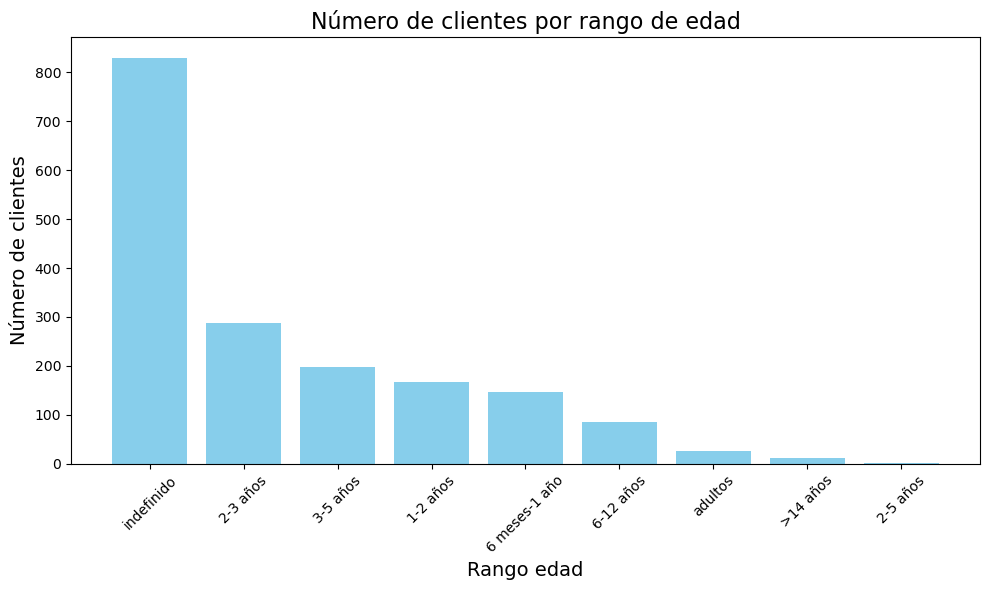

In [77]:
# Create a vertical bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(age_range_aggregation['Rango edad'], age_range_aggregation['Número de clientes'], color='skyblue')

# Set the title and labels
plt.title('Número de clientes por rango de edad', fontsize=16)
plt.xlabel('Rango edad', fontsize=14)
plt.ylabel('Número de clientes', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x labels
plt.show()

##### Podemos observar que el rango de edad de la mayor parte de clientes oscila de 1-5 años, indefinido es un rango general en el que puede entrar cualquier edad. Las campañas de marketing deberían de dirigirse y reforzarse a público de este rango de edad. 

***

#### EXPLORATORY DATA ANALYSIS

##### De la tabla de clientes totales en el centro tenemos las situientes KPIs.

In [78]:
# Define functions for KPIs
def calculate_conversion_rate(df):
    total_clients = len(df)
    paying_clients = df[(df['Importe'] > 0) & 
                        (df['Fecha comienzo'] != pd.Timestamp.min) & 
                        (df['Fecha finalización'] != pd.Timestamp.min)]
    paying_clients_count = len(paying_clients)
    conversion_rate = (paying_clients_count / total_clients) * 100 if total_clients > 0 else 0
    return conversion_rate

def calculate_engagement_metric(df):
    # Calculate average duration of engagement
    average_engagement_duration = df['Duración'].mean()
    return average_engagement_duration

# Calculate total number of clients
total_clients = len(total_clientes)

# Calculate leads and free service clients
leads = total_clientes[total_clientes['Importe'] == 0]
leads_count = len(leads)

free_service_clients = total_clientes[
    (total_clientes['Importe'] == 0) & 
    (total_clientes['Fecha comienzo'] != pd.Timestamp.min) & 
    (total_clientes['Fecha finalización'] != pd.Timestamp.min)
]
free_service_count = len(free_service_clients)

# Calculate active clients
paying_clients = total_clientes[
    (total_clientes['Importe'] > 0) & 
    (total_clientes['Fecha comienzo'] != pd.Timestamp.min) & 
    (total_clientes['Fecha finalización'] != pd.Timestamp.min)
]
paying_clients_count = len(paying_clients)

# Calculate ratios
leads_ratio = (leads_count / total_clients) * 100 if total_clients > 0 else 0
free_service_ratio = (free_service_count / total_clients) * 100 if total_clients > 0 else 0
paying_ratio = (paying_clients_count / total_clients) * 100 if total_clients > 0 else 0

# Calculate KPIs using functions
conversion_rate = calculate_conversion_rate(total_clientes)
average_engagement_duration = calculate_engagement_metric(total_clientes)

# Display results
print(f"Clientes totales en la tabla: {total_clients}")
print(f"Leads para información: {leads_count} ({leads_ratio:.2f}%)")
print(f"Leads con servicio gratis: {free_service_count} ({free_service_ratio:.2f}%)")
print(f"Clientes activos: {paying_clients_count} ({paying_ratio:.2f}%)")
print(f"Tasa de conversión: {conversion_rate:.2f}%")
print(f"Promedio de duración de compromiso: {average_engagement_duration:.2f} meses")

Clientes totales en la tabla: 1750
Leads para información: 662 (37.83%)
Leads con servicio gratis: 82 (4.69%)
Clientes activos: 1088 (62.17%)
Tasa de conversión: 62.17%
Promedio de duración de compromiso: 2.93 meses


##### Los datos muestran patrones interesantes en la base de clientes y métricas de conversión:

1. Segmentación de Clientes:
- De un total de 1,750 clientes, el segmento más grande corresponde a Clientes Activos con 1,088 (62.17%)
- Los Leads para Información representan una porción significativa con 662 clientes (37.83%)
- Los Leads con Servicio Gratis son el segmento más pequeño con 82 clientes (4.69%)

2. Rendimiento de Conversión:
- La tasa de conversión del 62.17% es notablemente alta, indicando que más de la mitad de todos los clientes se convierten en clientes pagadores
- Esto sugiere un embudo de ventas efectivo y una propuesta de valor que logra convertir exitosamente leads en clientes activos

3. Compromiso del Cliente:
- La duración promedio de compromiso de 2.93 meses indica un período de engagement relativamente corto
- Esto podría presentar una oportunidad para implementar estrategias de retención para extender el ciclo de vida del cliente

Recomendaciones:
1. Investigar qué hace que la tasa de conversión sea tan exitosa para mantenerla y potencialmente mejorarla
2. Considerar si el programa de servicio gratuito (con solo 82 clientes) está siendo utilizado efectivamente como herramienta de conversión

##### Clientes dados de alta por año.

In [79]:
# Extract year from 'Fecha alta' and count clients per year
clients_by_year = socios_totales['Fecha alta'].dt.year.value_counts().sort_index()
print(clients_by_year)

Fecha alta
2019     43
2020     37
2021    122
2022    199
2023    532
2024    727
2025     85
Name: count, dtype: int64


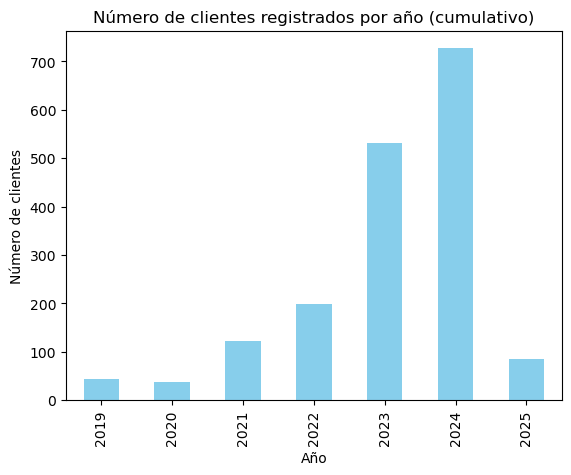

In [80]:
# Plotting the data
ax = socios_totales['Fecha alta'].dt.year.value_counts().sort_index().plot(kind='bar', color='skyblue')

# Setting the title and y-axis label
ax.set_title('Número de clientes registrados por año (cumulativo)')
ax.set_ylabel('Número de clientes')

# Optionally, you can also set the x-axis label
ax.set_xlabel('Año')

# Show the plot
plt.show()

##### Agregación de clientes activos por la duración de su servicio y porcentaje.

In [81]:
# Filter only paying clients first
paying_clients_df = total_clientes[total_clientes['Importe'] > 0]

# Calculate total number of paying clients
total_paying_clients = len(paying_clients_df)

# Group by Duration and count paying clients
clients_by_duration = paying_clients_df.groupby('Duración')['Cliente'].count().reset_index(name='Count')

# Add percentage column with % symbol (percentages of paying clients)
clients_by_duration['Porcentaje'] = (clients_by_duration['Count'] / total_paying_clients * 100).round(2).astype(str) + '%'

# Sort by Duration
clients_by_duration = clients_by_duration.sort_values('Duración')

print(f"Total de clientes activos en la tabla: {total_paying_clients}")
print("\nDistribución por duración (en meses):")
print(clients_by_duration)

Total de clientes activos en la tabla: 1088

Distribución por duración (en meses):
    Duración  Count Porcentaje
0          0     28      2.57%
1          1    297      27.3%
2          2     59      5.42%
3          3    141     12.96%
4          4    182     16.73%
5          5     53      4.87%
6          6     64      5.88%
7          7     15      1.38%
8          8      4      0.37%
9          9     18      1.65%
10        10    217     19.94%
11        11      8      0.74%
12        14      2      0.18%


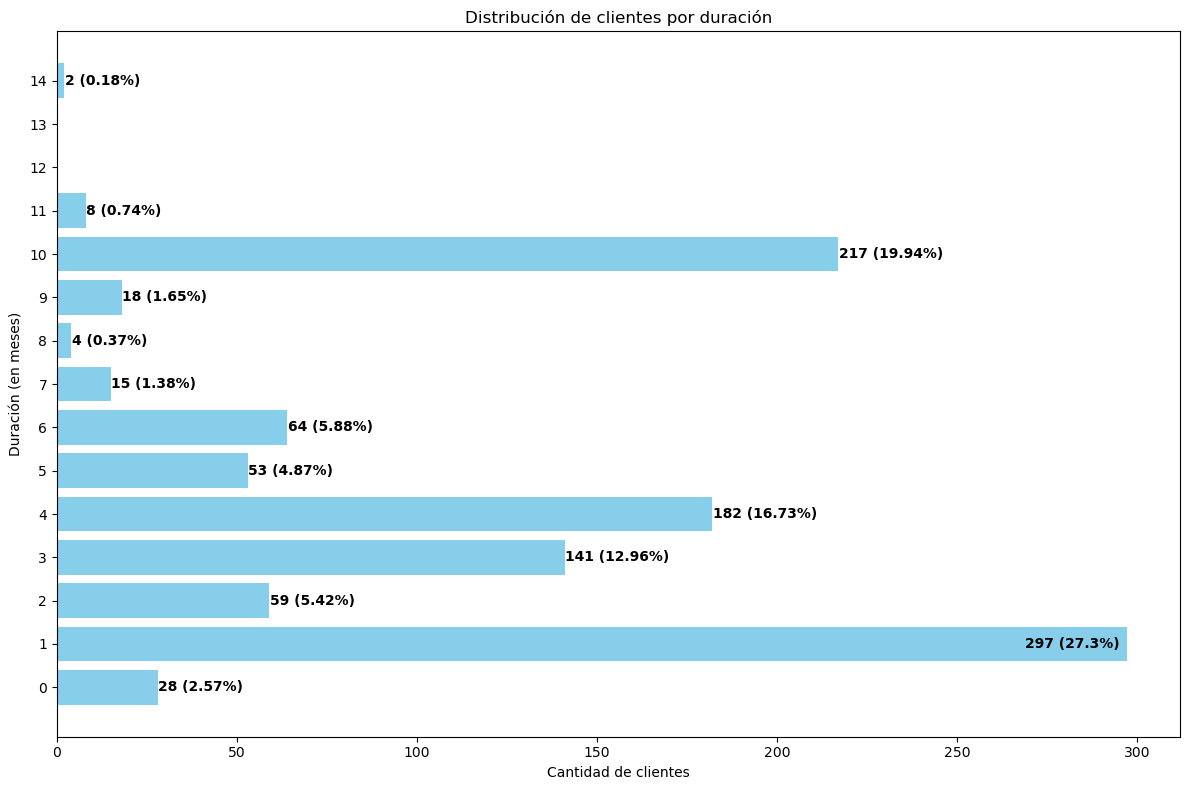

In [82]:
# Create horizontal bar plot
plt.figure(figsize=(12, 8))
bars = plt.barh(clients_by_duration['Duración'], clients_by_duration['Count'], color='skyblue')

# Customize the plot
plt.title('Distribución de clientes por duración')
plt.xlabel('Cantidad de clientes')
plt.ylabel('Duración (en meses)')

# Set y-axis to show all duration values
plt.yticks(range(int(min(clients_by_duration['Duración'])), int(max(clients_by_duration['Duración'])) + 1))

# Add count and percentage labels on the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    percentage = clients_by_duration["Porcentaje"].iloc[i]
    
    # Special handling for the longest bar (Duration = 1, which has the highest count)
    if clients_by_duration['Count'].iloc[i] == clients_by_duration['Count'].max():
        plt.text(width - 2, bar.get_y() + bar.get_height()/2, 
                f'{int(width)} ({percentage})',
                ha='right', va='center', fontweight='bold')
    else:
        plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
                f'{int(width)} ({percentage})',
                ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [83]:
# Get total number of paying clients
total_paying_clients = len(total_clientes[total_clientes['Importe'] > 0])
print(total_paying_clients)

# Filter for paying clients and group by year
paying_clients_by_year = total_clientes[total_clientes['Importe'] > 0].groupby(total_clientes['Fecha comienzo'].dt.year)\
    .size().reset_index(name='Count')
print(paying_clients_by_year)

1088
   Fecha comienzo  Count
0            2021      1
1            2022     13
2            2023    109
3            2024    565
4            2025    400


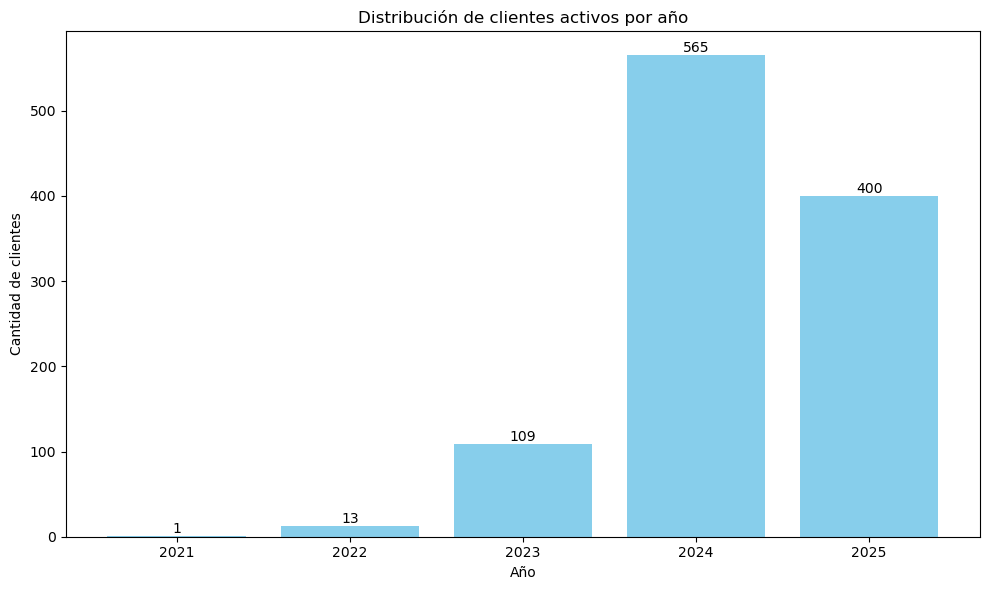

In [84]:
# Create vertical bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(paying_clients_by_year['Fecha comienzo'], paying_clients_by_year['Count'], color='skyblue')

# Customize the plot
plt.title('Distribución de clientes activos por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de clientes')

# Add count labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{int(height)}',
             ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [85]:
# Group by Actividad and count
activity_counts = total_clientes.groupby('Actividad', dropna=False)['Cliente'].count().reset_index()

# Rename the count column
activity_counts = activity_counts.rename(columns={'Cliente': 'Número de clientes'})

# Sort by number of clients in descending order
activity_counts = activity_counts.sort_values('Número de clientes', ascending=False)

# Calculate percentages
activity_counts['Porcentaje'] = (activity_counts['Número de clientes'] / len(total_clientes) * 100).round(2)
activity_counts['Porcentaje'] = activity_counts['Porcentaje'].astype(str) + '%'

print("\nNúmero y procentaje de clientes por actividad:")
print(activity_counts)


Número y procentaje de clientes por actividad:
                   Actividad  Número de clientes Porcentaje
12     sin actividad vigente                 826      47.2%
3              bebes mayores                 178     10.17%
4             bebes medianos                 167      9.54%
5             bebes pequeños                 146      8.34%
6          bebes pre escuela                 110      6.29%
11               pre escuela                 103      5.89%
10          grupos reducidos                  94      5.37%
8                    escuela                  85      4.86%
0   act acuatica embarazadas                  25      1.43%
1        adultos aprendizaje                   7       0.4%
2      adultos mantenimiento                   4      0.23%
7              bono 10 baños                   4      0.23%
9        escuelas infantiles                   1      0.06%


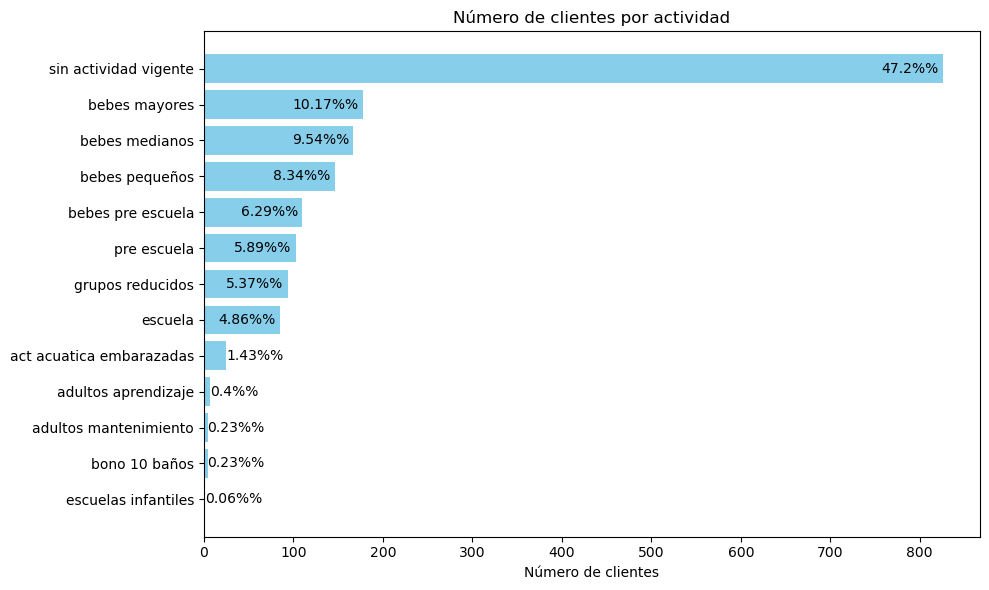

In [86]:
# Sort the DataFrame by 'Número de clientes' in descending order
activity_counts = activity_counts.sort_values('Número de clientes', ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(activity_counts['Actividad'], activity_counts['Número de clientes'], color='skyblue')
plt.xlabel('Número de clientes')
plt.title('Número de clientes por actividad')

# Add percentage labels on the bars
for index, bar in enumerate(bars):
    width = bar.get_width()
    percentage = activity_counts['Porcentaje'].iloc[index]
    # Place the text inside the bar if the bar is long enough
    if width > 25:  # Adjust this threshold as needed
        plt.text(width - 5, bar.get_y() + bar.get_height() / 2, f'{percentage}%', va='center', ha='right', color='black')
    else:
        plt.text(width, bar.get_y() + bar.get_height() / 2, f'{percentage}%', va='center', ha='left')

plt.tight_layout()
plt.show()

In [87]:
# Check if the dates match
socios_totales['Dates Match'] = socios_totales['Fecha alta'] == socios_totales['Fecha comienzo']

# Print the results
print(socios_totales[['Cliente', 'Fecha alta', 'Fecha comienzo', 'Dates Match']])

                                          Cliente Fecha alta  \
0                    Juan De La Fuente Hormaechea 2023-10-13   
1                                Bosco Moro Conde 2019-04-12   
2                        Chloe D'Agostino Fuertes 2019-04-14   
3                              Lucia Molero Lopez 2019-05-04   
4                            Juan Gutierrez Lopez 2019-05-05   
...                                           ...        ...   
1740                     Cp Enzo Velasco Gonzalez 2025-01-15   
1741  Cp Lucia Yunquera Aguirre (3 Años En Abril) 2025-01-15   
1742                    Cp Laia Gutiérrez Fuentes 2025-01-15   
1743                       Cp Antonella Antonella 2025-01-15   
1744                           Cp Davinia Davinia 2025-01-15   

                    Fecha comienzo  Dates Match  
0    2024-09-16 00:00:00.000000000        False  
1    2024-09-01 00:00:00.000000000        False  
2    2025-01-01 00:00:00.000000000        False  
3    2024-09-01 00:00:00.000000

In [88]:
# Count the number of clients where dates do match
count_true_dates = socios_totales['Dates Match'].value_counts().get(True, 0)

print(f"Número de clientes con fechas coincidentes: {count_true_dates}")

Número de clientes con fechas coincidentes: 69


In [89]:
# Count the number of clients where dates do not match
count_false_dates = socios_totales['Dates Match'].value_counts().get(False, 0)

print(f"Número de clientes con fechas que no coinciden: {count_false_dates}")

Número de clientes con fechas que no coinciden: 1676


##### Del analisis anterior se deduce que 69 clientes se dieron de alta y comenzaron el servicio el mismo día y 1676 clientes se dieron de alta pero no comenzaron el servicio el mismo día.

***

##### Clientes no activos: (CATEGORÍA NO-ACTIVOS)

In [90]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 662 entries, 4 to 1743
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  662 non-null    object        
 1   Cliente             662 non-null    object        
 2   Teléfono            662 non-null    object        
 3   Email               662 non-null    object        
 4   Actividad           662 non-null    object        
 5   Importe             662 non-null    float64       
 6   Fecha comienzo      662 non-null    datetime64[ns]
 7   Fecha finalización  662 non-null    datetime64[ns]
 8   Duración            662 non-null    int64         
 9   Tipo cliente        662 non-null    object        
 10  Rango edad          662 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 62.1+ KB


In [91]:
leads['Duración'].unique()

array([ 0,  1,  2,  6,  4,  3, 10,  5,  7,  8,  9])

In [92]:
# Group clients by Duration
duration_groups = leads.groupby('Duración')['Cliente'].count()
print("\nNumber of clients by Duration:")
print(duration_groups)


Number of clients by Duration:
Duración
0     584
1      25
2       7
3       9
4       9
5       2
6       9
7       3
8       1
9       2
10     11
Name: Cliente, dtype: int64


In [93]:
clients_with_0_duration = leads[leads['Duración'] == 0]
clients_with_0_duration['Fecha comienzo'].unique()

<DatetimeArray>
['1677-09-21 00:12:43.145224193',           '2025-01-02 00:00:00',
           '2024-06-01 00:00:00',           '2023-07-17 00:00:00']
Length: 4, dtype: datetime64[ns]

In [94]:
# Define zero_date
zero_date = pd.Timestamp.min 

# 1. Identify clients with zero_date in both date columns
zero_dates = leads[(leads['Fecha comienzo'] == zero_date) & 
                  (leads['Fecha finalización'] == zero_date)]

# 2. Identify clients with actual dates (non-zero dates)
actual_dates = leads[(leads['Fecha comienzo'] != zero_date) & 
                    (leads['Fecha finalización'] != zero_date)]

# 3. Print aggregations
print("1. Clientes con zero_date en ambas columnas (Duración = 0):")
print(f"Count: {len(zero_dates)}")

# For clients without zero_date on both columns
non_zero_dates = leads[~((leads['Fecha comienzo'] == pd.Timestamp.min) & (leads['Fecha finalización'] == pd.Timestamp.min))]
print("\n2. Clientes con fechas reales en ambas columnas:")
print(f"Count: {len(non_zero_dates)}")

print("\n2. Clientes con fechas reales por Duración:")
duration_distribution = actual_dates.groupby('Duración')['Cliente'].agg(['count'])
print(duration_distribution)

# 4. Detailed breakdown for each duration > 0
for duration in [1, 2, 3, 4, 6]:
    clients_with_duration = actual_dates[actual_dates['Duración'] == duration]
    print(f"\nClientes con Duración = {duration}:")
    print(clients_with_duration[['Cliente', 'Duración', 'Fecha comienzo', 'Fecha finalización']])

# 5. Create summary DataFrame
summary = pd.DataFrame({
    'Category': [
        'Zero dates (Duration = 0)',
        'Duration = 1 month',
        'Duration = 2 months',
        'Duration = 3 months',
        'Duration = 4 months',
        'Duration = 6 months'
    ],
    'Count': [
        len(zero_dates),
        len(actual_dates[actual_dates['Duración'] == 1]),
        len(actual_dates[actual_dates['Duración'] == 2]),
        len(actual_dates[actual_dates['Duración'] == 3]),
        len(actual_dates[actual_dates['Duración'] == 4]),
        len(actual_dates[actual_dates['Duración'] == 6])
    ]
})

1. Clientes con zero_date en ambas columnas (Duración = 0):
Count: 580

2. Clientes con fechas reales en ambas columnas:
Count: 82

2. Clientes con fechas reales por Duración:
          count
Duración       
0             4
1            25
2             7
3             9
4             9
5             2
6             9
7             3
8             1
9             2
10           11

Clientes con Duración = 1:
                            Cliente  Duración Fecha comienzo  \
5          Jeremias Hidrobo Linares         1     2023-08-01   
241              Salomé Agudo Agudo         1     2024-09-10   
293   Hector Sanchez Salas (Tienda)         1     2024-11-13   
350          Arane Pulido Rodriguez         1     2024-10-07   
467      Sport Consulting (Pruebas)         1     2021-09-01   
487       Blanca Valhondo Rodriguez         1     2023-06-22   
520            Adrian Parrilla Diaz         1     2024-01-01   
761           Marta Hernando Matias         1     2024-12-01   
1360        

In [95]:
# Save file with new name 'clientes_no_activos'.
leads.to_csv('/Users/cesarchaparro/Desktop/GitHub/Chapoteos/tablas/CSV/leads.csv', index=False)

In [96]:
# Read the file into a DataFrame
leads = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Chapoteos/tablas/CSV/leads.csv')
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  662 non-null    float64
 1   Cliente             662 non-null    object 
 2   Teléfono            662 non-null    object 
 3   Email               662 non-null    object 
 4   Actividad           662 non-null    object 
 5   Importe             662 non-null    float64
 6   Fecha comienzo      662 non-null    object 
 7   Fecha finalización  662 non-null    object 
 8   Duración            662 non-null    int64  
 9   Tipo cliente        662 non-null    object 
 10  Rango edad          662 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 57.0+ KB


In [97]:
# Convert ID to string
leads['ID'] = leads['ID'].astype(str)

# Convert date columns to datetime with error handling
leads['Fecha comienzo'] = pd.to_datetime(leads['Fecha comienzo'], 
                                                              format='mixed',  # Handle mixed formats
                                                              errors='coerce')  # Handle any problematic conversions

leads['Fecha finalización'] = pd.to_datetime(leads['Fecha finalización'], 
                                                                  format='mixed',  # Handle mixed formats
                                                                  errors='coerce')  # Handle any problematic conversions


***

##### Socios Baja: (categoria No-Activos)

In [98]:
# Read the Excel file into a DataFrame
socios_baja = pd.read_csv('/Users/cesarchaparro/Desktop/GitHub/Chapoteos/tablas/CSV/socios_de_baja.csv')

# Display the first few rows of the DataFrame
socios_baja.head()

,ID,Nombre del socio,Tel. móvil,Correo electrónico,Fecha baja,Motivo baja,Nota
0,2,Valentina Chiralt,649036026.0,jchiralt@hotmail.com,01/07/2023 00:00,Baja Administrativa,tienen piscina el la urb. todo el curso
1,3,Cristina Dopico,650954696.0,cristina_ferrol@hotmail.com,01/10/2020 00:00,Baja Administrativa,NaN
2,4,Paloma Barrie,609616193.0,paloma.barrie@gmail.com,01/10/2020 00:00,Baja Administrativa,NaN
3,5,Patricia Abril Gonzalez,NaN,NaN,12/05/2022 00:00,Baja Administrativa,se dio de alta hoy por prueba en un recurso
4,6,ALBERTO ROMERA IGEA,619981017.0,ROMERAI@MAPFRE.COM,01/10/2020 00:00,Baja Administrativa,NaN


##### Cleaning data types and format of the dataframe.

In [99]:
# Rename columns
socios_baja = socios_baja.rename(columns={
    'Nombre del socio': 'Cliente',
    'Tel. móvil': 'Teléfono',
    'Correo electrónico': 'Email'
})

In [100]:
# Convert 'Fecha de baja' to datetime
socios_baja['Fecha baja'] = pd.to_datetime(socios_baja['Fecha baja'], errors='coerce', dayfirst=True)
# Convert the 'Telefono' column to string (and remove any unnecessary '.0')
socios_baja['Teléfono'] = socios_baja['Teléfono'].astype(str).str.replace('.0', '', regex=False)
# Convert the "Motivo baja" column to lowercase
socios_baja['Motivo baja'] = socios_baja['Motivo baja'].str.lower()
# Correct the capitalization of the 'Cliente' column
socios_baja['Cliente'] = socios_baja['Cliente'].str.title()
# Convert the email column to lowercase
socios_baja['Email'] = socios_baja['Email'].str.lower()

In [101]:
# Fill missing values in the 'Email' column with 'desconocido'
socios_baja['Email'] = socios_baja['Email'].fillna('desconocido')

In [102]:
# Drop rows where ID is NaN
socios_baja = socios_baja.dropna(subset=['ID'])
socios_baja = socios_baja[socios_baja['ID'].notna()]

In [103]:
# Check for NaN values in Cliente column
nan_clientes = socios_baja[socios_baja['Cliente'].isna()]
# Drop rows where Cliente is NaN
socios_baja = socios_baja.dropna(subset=['Cliente'])
socios_baja = socios_baja[socios_baja['Cliente'].notna()]


In [104]:
socios_baja.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7722 entries, 0 to 7721
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           7722 non-null   object        
 1   Cliente      7722 non-null   object        
 2   Teléfono     7722 non-null   object        
 3   Email        7722 non-null   object        
 4   Fecha baja   7722 non-null   datetime64[ns]
 5   Motivo baja  7722 non-null   object        
 6   Nota         5167 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 482.6+ KB


##### Handle duplicates.

In [105]:
# Check duplicates in ID column
id_duplicates = socios_baja[socios_baja['ID'].duplicated(keep=False)]
print("Duplicates in ID column:")
print(f"Number of duplicate IDs: {len(id_duplicates)}")
if len(id_duplicates) > 0:
    print("\nRecords with duplicate IDs:")
    print(id_duplicates.sort_values('ID'))

print("\n" + "="*50 + "\n")

# Check duplicates in Cliente column
cliente_duplicates = socios_baja[socios_baja['Cliente'].duplicated(keep=False)]
print("Duplicates in Cliente column:")
print(f"Number of duplicate Clients: {len(cliente_duplicates)}")
if len(cliente_duplicates) > 0:
    print("\nRecords with duplicate Clients:")
    print(cliente_duplicates.sort_values('Cliente'))

Duplicates in ID column:
Number of duplicate IDs: 0


Duplicates in Cliente column:
Number of duplicate Clients: 176

Records with duplicate Clients:
         ID                       Cliente   Teléfono                   Email  \
2581   3412                           . .        nan             desconocido   
3086   4362                           . .        nan             desconocido   
3097   4376                           . .        nan             desconocido   
7241  13407  Alejandro Hortelano Chavesta  682909492    p.chavesta@gmail.com   
3307   4727  Alejandro Hortelano Chavesta  699102023  jl.hortelano@gmail.com   
...     ...                           ...        ...                     ...   
453     481                  Sara Bercial        nan             desconocido   
2616   3488    Valeria Hernandez Gonzalez  626129161             desconocido   
2952   4111    Valeria Hernandez Gonzalez  696312412      lidiagl7@yahoo.com   
5489   8883             Zoe Romano Blanco  6565338

In [106]:
# Create a list of the IDs we want to check
ids_to_check = ['3412', '4362', '4376']  # Assuming IDs are strings
# If IDs are integers, use: ids_to_check = [3412, 4362, 4376]

# Filter the DataFrame
selected_rows = socios_baja[socios_baja['ID'].isin(ids_to_check)]

# Display the results
print(f"Found {len(selected_rows)} rows with the specified IDs:")
print("\nSelected rows:")
print(selected_rows)

Found 3 rows with the specified IDs:

Selected rows:
        ID Cliente Teléfono        Email Fecha baja          Motivo baja  \
2581  3412     . .      nan  desconocido 2021-10-04  baja administrativa   
3086  4362     . .      nan  desconocido 2021-10-07  baja administrativa   
3097  4376     . .      nan  desconocido 2021-10-07  baja administrativa   

                 Nota  
2581              NaN  
3086   ficha repetida  
3097   ficha repetida  


In [107]:
# Drop the rows
socios_baja = socios_baja[~socios_baja['ID'].isin(ids_to_check)]
# Drop the 'Nota' column
socios_baja = socios_baja.drop('Nota', axis=1)

In [108]:
socios_baja.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7719 entries, 0 to 7721
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           7719 non-null   object        
 1   Cliente      7719 non-null   object        
 2   Teléfono     7719 non-null   object        
 3   Email        7719 non-null   object        
 4   Fecha baja   7719 non-null   datetime64[ns]
 5   Motivo baja  7719 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 422.1+ KB


##### Handle missing values.

In [109]:
# Fill missing values in the 'Email' column with 'desconocido'
socios_baja['Email'] = socios_baja['Email'].fillna('desconocido')
# Fill missing values in the 'Teléfono' column with 'desconocido'
socios_baja['Teléfono'] = socios_baja['Teléfono'].fillna('desconocido')
# Print unique values in the 'Motivo de Baja' column
print(socios_baja['Motivo baja'].unique())

['baja administrativa' 'por trabajo' 'por descontento con la atención'
 'por cambio de ciudad' 'por enfermedad o lesión' 'baja meses de verano'
 'por que no puede pagar' 'por descontento con la instalacion'
 'no logro mis objetivos' 'por examenes']


In [110]:
# Create a dictionary for the mapping
motivo_mapping = {
    'por trabajo': 'trabajo',
    'por descontento con la atención': 'descontento con la atención',
    'por cambio de ciudad': 'cambio de ciudad',
    'por enfermedad o lesión': 'enfermedad o lesión',
    'por que no puede pagar': 'no puede pagar',
    'por descontento con la instalacion': 'descontento con la instalacion',
    'por examenes': 'examenes'
}
# Replace the values using the mapping
socios_baja['Motivo baja'] = socios_baja['Motivo baja'].replace(motivo_mapping)

In [111]:
# Fill missing values in the 'Motivo baja' column with 'desconocido'
socios_baja['Motivo baja'] = socios_baja['Motivo baja'].fillna('desconocido')

In [112]:
# Group by 'Motivo baja' and count the number of clients
reason_counts = socios_baja.groupby('Motivo baja').size().reset_index(name='Count')
# Calculate percentages
total = reason_counts['Count'].sum()
reason_counts['Percentage'] = (reason_counts['Count'] / total) * 100
# Format the 'Percentage' column as rounded percentages with a '%' symbol
reason_counts['Percentage'] = reason_counts['Percentage'].apply(lambda x: f"{x:.2f}%")
# Display the result
print(reason_counts)

                      Motivo baja  Count Percentage
0             baja administrativa   6375     82.59%
1            baja meses de verano     44      0.57%
2                cambio de ciudad    104      1.35%
3     descontento con la atención     15      0.19%
4  descontento con la instalacion      8      0.10%
5             enfermedad o lesión    305      3.95%
6                        examenes      1      0.01%
7          no logro mis objetivos     13      0.17%
8                  no puede pagar     81      1.05%
9                         trabajo    773     10.01%


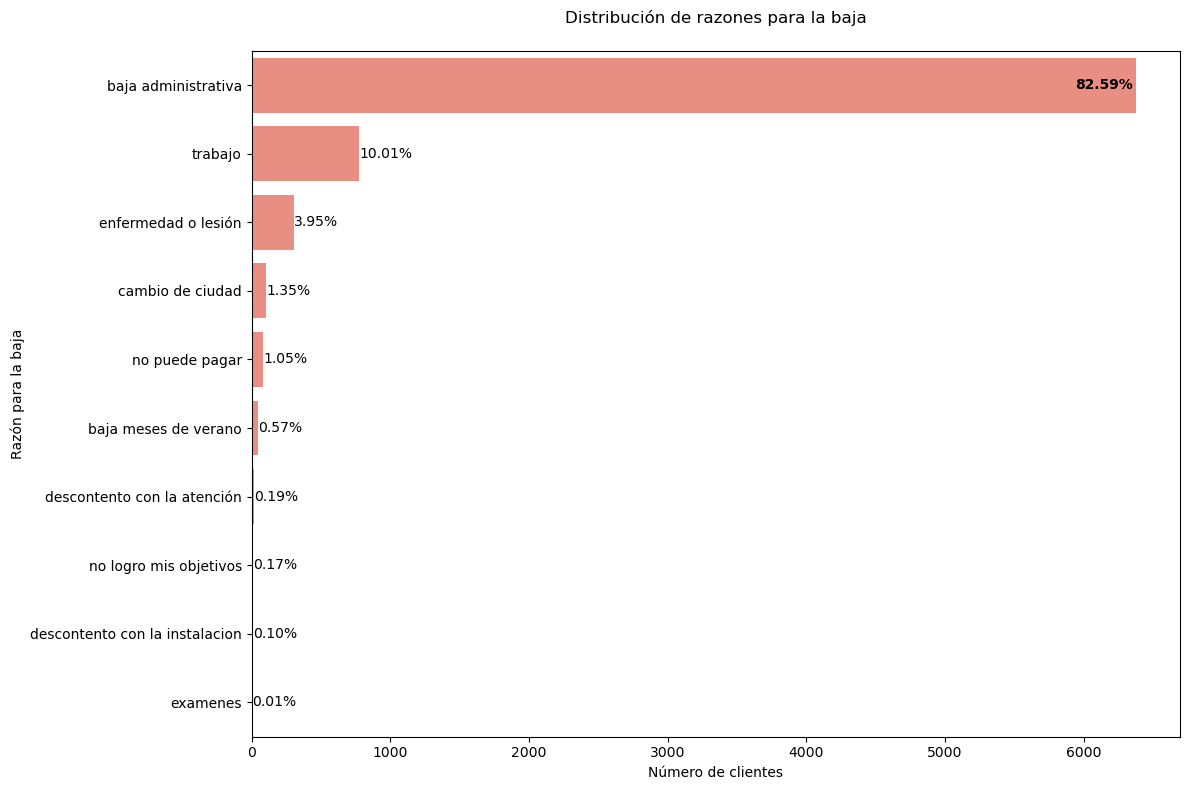

In [113]:
# Sort values in descending order
reason_counts_sorted = reason_counts.sort_values('Count', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(y='Motivo baja', x='Count', data=reason_counts_sorted, color='salmon')
plt.title('Distribución de razones para la baja', pad=20)
plt.xlabel('Número de clientes')
plt.ylabel('Razón para la baja')

# Determine the index of the longest bar
max_index = reason_counts_sorted['Count'].idxmax()

# Add percentage labels
for i, v in enumerate(reason_counts_sorted['Count']):
    percentage = reason_counts_sorted['Percentage'].iloc[i]
    if i == max_index:
        # Place the text inside the longest bar
        plt.text(v - 20, i, f'{percentage}', va='center', ha='right', color='black', fontweight='bold')
    else:
        # Place the text outside the other bars
        plt.text(v + 2, i, f'{percentage}', va='center', ha='left')

plt.tight_layout()
plt.show()

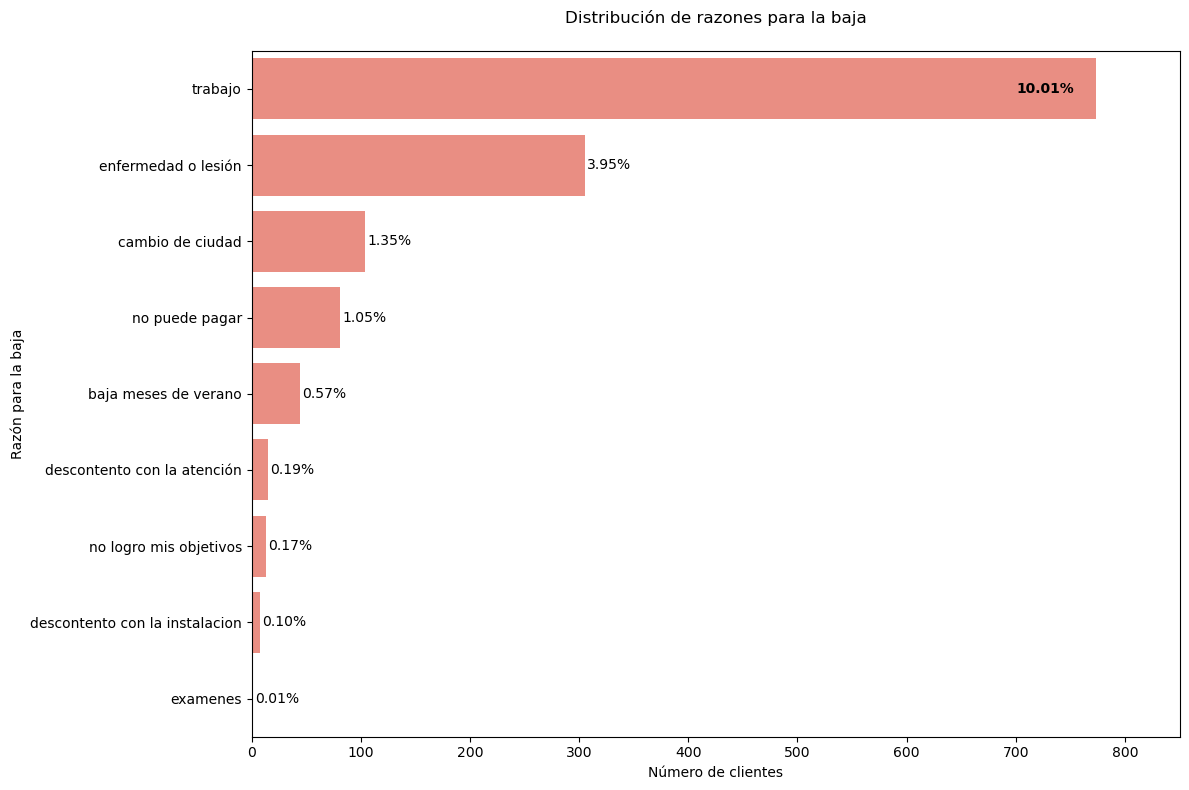

In [114]:
# Exclude 'baja administrativa' from the plot
reason_counts_filtered = reason_counts[reason_counts['Motivo baja'] != 'baja administrativa']
reason_counts_sorted = reason_counts_filtered.sort_values('Count', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
ax = sns.barplot(y='Motivo baja', x='Count', data=reason_counts_sorted, color='salmon')
plt.title('Distribución de razones para la baja', pad=20)
plt.xlabel('Número de clientes')
plt.ylabel('Razón para la baja')

# Get the maximum value for x-axis
max_count = reason_counts_sorted['Count'].max()

# Add percentage labels
for i, (v, percentage) in enumerate(zip(reason_counts_sorted['Count'], reason_counts_sorted['Percentage'])):
    if i == 0:  # First bar is the longest
        # Place the text inside the bar near the right edge
        ax.text(v - 20, i, f'{percentage}', va='center', ha='right', color='black', fontweight='bold')
    else:
        # Place the text outside the other bars
        ax.text(v + 2, i, f'{percentage}', va='center', ha='left')

# Ensure x-axis limit accommodates all labels
plt.xlim(0, max_count * 1.1)

plt.tight_layout()
plt.show()

In [115]:
# Find common clients
common_clients = leads[leads['Cliente'].isin(socios_baja['Cliente'])]

# Number of common clients
common_clients

,ID,Cliente,Teléfono,Email,Actividad,Importe,Fecha comienzo,Fecha finalización,Duración,Tipo cliente,Rango edad
57,11222.0,Cp Daniela Daniela,669620909.0,desconocido,sin actividad vigente,0.0,1677-09-21 00:12:43.145224193,1677-09-21 00:12:43.145224193,0,Lead para información,indefinido
114,12107.0,Cp Cristina Cristina,636670198.0,criscave90@hotmail.com,sin actividad vigente,0.0,1677-09-21 00:12:43.145224193,1677-09-21 00:12:43.145224193,0,Lead para información,indefinido
150,12448.0,Prueba Prueba,desconocido,desconocido,sin actividad vigente,0.0,1677-09-21 00:12:43.145224193,1677-09-21 00:12:43.145224193,0,Lead para información,indefinido
204,13213.0,Cp Alejandra Alejandra,643719313.0,piperuiz20-10@hotmail.com,sin actividad vigente,0.0,1677-09-21 00:12:43.145224193,1677-09-21 00:12:43.145224193,0,Lead para información,indefinido
209,13263.0,Cp Marcela Marcela,625666580.0,marcelavesgav@gmail.com,sin actividad vigente,0.0,1677-09-21 00:12:43.145224193,1677-09-21 00:12:43.145224193,0,Lead para información,indefinido
216,13335.0,!Cp Daniela Daniela,647631271.0,danylove9101@gmail.com,sin actividad vigente,0.0,1677-09-21 00:12:43.145224193,1677-09-21 00:12:43.145224193,0,Lead para información,indefinido
232,13466.0,Cp Alba Alba,desconocido,albamfiq@hotmail.com,sin actividad vigente,0.0,1677-09-21 00:12:43.145224193,1677-09-21 00:12:43.145224193,0,Lead para información,indefinido
356,15378.0,Cp Pelayo Fernandez-Montes Perez,646393401.0,desconocido,sin actividad vigente,0.0,1677-09-21 00:12:43.145224193,1677-09-21 00:12:43.145224193,0,Lead para información,indefinido
463,9061.0,Cp Nuria Nuria,687759918.0,ncrol74@gmail.com,sin actividad vigente,0.0,1677-09-21 00:12:43.145224193,1677-09-21 00:12:43.145224193,0,Lead para información,indefinido


##### En la tabla de socios_baja hay 9 clientes que son leads por información.

***

#### KPIs actuales:
##### Número de clientes por rango de edad: esta ayuda a comprender la distribución demográfica de tus clientes, que es crucial para los objetivos de estrategias de marketing.

##### Leads para información: llevar un registro de cuántos clientes potenciales están interesados en tus servicios puede ayudar a determinar la eficacia de tu esfruerzo en marketing.

##### Leads con un servicio gratis: esta KPI puede indicar el éxito de las ofertas promocionales y cómo se convierten los leads en clientes potenciales que compran.

##### Clientes activos: saber el número de clientes activos ayuda a comprender el nivel de pentración actual en el mercado y la retención de clientes.

##### Número de clientes activos por año (acumulativo): esto proporciona información de tendencias de crecimiento a través del tiempo, que es una parte esencial para la planificación estratégica.

##### Distribución de clientes por duración del servicio: esta ayuda a comprender el nivel de lealtad y el promedio de ciclo de vida de un cliente.

##### Distribución de clientes activos por año: esta puede mostrar las tendencias en el compromiso del cliente y de la retención a través del tiempo.

##### Número de clientes por actividad: comprender qué actividades son más populares puede guiar la asignación de recursos y enfocar el marketing.

##### Distribución de cancelacion de subscripción por categorías de razones: esta es crítica para identificar las areas de mejoramiento y reducir abandonos.

***